<a href="https://colab.research.google.com/github/Pitwutz/rocket-riding/blob/main/notebooks/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Exploration and Understanding


## base path and colab setup


In [5]:
import sys
import os

# Adjust the path as needed to reach your project root from the notebook's location
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

project_root

'/Users/peterfalterbaum/Documents/Nova/thesis local/implementation/public_implementation'

In [6]:
from config import PROJECT_ROOT
from pathlib import Path

In [7]:
import logging

# Configure logging
logging.basicConfig(level=logging.INFO)

# Check if running on Google Colab
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')
    base_path = 'drive/MyDrive/'
    logging.info("Running on Google Colab")
else:
    base_path = '/Users/peterfalterbaum/Documents/Nova/thesis local/implementation/rocket riding'
    logging.info("Running on local environment")

INFO:root:Running on local environment


## 1. Imports


In [8]:
# colab specific imports
import os
import sys
if 'google.colab' in str(get_ipython()):
    import fireducks.pandas as pd
else:
    import pandas as pd

# general imports
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd

pd.set_option('display.max_columns', 200)


# Add the src directory to the Python path
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

In [9]:
# Import utility functions

from data_utils import *

INFO:root:Workspace root: /Users/peterfalterbaum/Documents/Nova/thesis local/implementation/public_implementation
INFO:root:Data directory path: /Users/peterfalterbaum/Documents/Nova/thesis local/implementation/public_implementation/data/raw/ODiN Data


## 2. Data Overview


### 2.1 Data Loading

- Code and methods used to load the dataset.


In [10]:
data_base_path = base_path + "/data/raw/"
odin_path = data_base_path + "ODiN Data"

df_kinds = pd.read_csv(odin_path + "/tbl_kinds.csv")

df_persons = pd.read_csv(odin_path + "/tbl_persons.csv")

df_questions = pd.read_csv(odin_path + "/tbl_questions.csv")

df_nonserial_moves = pd.read_csv(odin_path + "/tbl_nonserial_moves.csv")

df_question_options = pd.read_csv(odin_path + "/tbl_question_options.csv")

gdf_netherlands = gpd.read_file(
    data_base_path + "location" + "/working_zips.geojson")

#### main datasets: persons and non serial moves


In [11]:
df_persons

,person_id,Person_index,OPID,Sample,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,NeighborhoodAdam,MRA,MRDH,Utr,Sex,Age,KLivet,Origin,BetWerk,OnbBez,MaatsPart,Course,HHBestInkG,HHGestInkG,HHLowInk,HHSocInk,HHWelvG,HHDriver's licenseAu,HHDriver's licenseMo,HHRdriver's licenseBr,OPDriver's licenseAu,OPDriver's licenseMo,OPDriver's licenseBr,HHAuto,HHAutoL,OPAuto,FuelPa1,XFuelPa1,FuelEPa1,Year of constructionPa1,KConstruction yearPa1,KWeightPa1,TenamePa1,FuelPa2,XFuelPa2,FuelEPa2,Year of constructionPa2,KYear of constructionPa2,KWeightPa2,TenamePa2,FuelPaL,XFuelPaL,FuelEPaL,Year of constructionPaL,KConstruction yearPaL,KWeightPaL,HHMotor,OPmotor,HHBrom,OPBrom,HHSnor,OPmustache,HHBicycle,HHPossessionVm,OPPossessionVm,FqWalk,FqNEFiets,FqEFike,FqBTM,FqTrain,FqAutoB,FqAutoP,FqBrMustache,FqMotor,OVStMap,WrkVervw,WrkVerg,VergVast,ComparativeKm,VergBrSt,VergOV,VergAans,Compare,VergBudg,VergPark,VergStal,VergAnd,BerWrk,RdWrkA,RdWrkB,BerOnd,RdOndA,RdOndB,BerSup,RdSupA,RdSupB,BerSick,RdZiekA,RdZiekB,BerArts,RdArtsA,RdArtsB,BerStat,RdStatA,RdStatB,BerHalte,RdHalteA,RdHalteB,BerFam,RdFamA,RdFamB,BerSport,RdSportA,RdSportB,Bank holiday,Been away,ReasonNW,ReasonNWZ,ReasonNWW,ReasonNWB,EBicycle,AutoEig,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,Car Rental,AutoAnd,ByzAdr,ByzVvm,ByzTyd,ByzDuration,ByzRoute,ByzReden,FactorH,FactorP,FactorV,Child6
0,0,1,3.000000e+11,8,1,1,1,0,0,0,1,3812,0,21,18,15,2,81,18,1,0,2,7,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,7,7,6,9995,9,7,3,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,5,4,12,3,2,2,2,2,2,2,2,2,2,2,7,14,14,7,14,14,5,5,6,4,5,12,4,5,12,7,14,14,7,14,14,5,5,12,7,14,14,0,0,1,3,10,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,148,148,54076,#NULL!
1,1,2,3.000010e+11,1,2,2,3,0,0,0,2,9481,0,21,18,21,2,65,15,1,0,1,3,2,6,6,8,9,6,2,1,2,1,0,1,3,0,0,1,0,0,2017,4,3,2,1,0,0,1991,1,1,2,7,7,6,9995,9,7,0,0,1,0,0,0,1,1,0,1,1,2,5,5,2,2,5,5,4,12,3,2,2,2,2,2,2,2,2,2,2,7,14,14,7,14,14,1,13,13,1,13,13,1,13,13,7,14,14,1,13,13,1,13,13,1,13,13,0,1,0,0,0,0,1,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,11,176,353,128711,0
2,2,3,3.000010e+11,1,3,3,3,0,0,0,3,9761,0,21,18,21,1,63,14,1,3,0,2,2,9,9,8,9,9,3,1,3,1,1,1,3,1,2,1,0,0,2014,3,2,1,1,0,0,2007,1,5,1,1,0,0,9994,8,6,0,0,0,0,0,0,1,1,2,2,5,2,5,5,1,5,5,5,4,5,0,2,2,2,2,2,2,2,2,2,2,1,13,13,1,13,13,1,13,13,1,13,13,1,13,13,1,13,13,1,13,13,1,13,13,1,13,13,0,1,0,0,0,0,5,2,1,2,2,2,2,2,2,2,2,3,3,3,3,3,11,140,421,153774,0
3,3,4,3.000010e+11,1,2,2,3,0,0,0,2,9482,0,21,18,21,1,61,14,1,0,7,8,2,10,10,8,9,10,2,0,2,1,0,1,1,0,0,1,0,0,2018,4,3,2,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,0,1,5,5,5,5,1,3,5,5,4,12,3,2,2,2,2,2,2,2,2,2,2,1,13,13,7,14,14,1,13,13,1,13,13,1,13,13,7,14,14,7,14,14,1,13,13,7,14,14,0,1,0,0,0,0,5,2,2,2,1,2,2,2,2,2,2,3,3,3,3,3,11,350,699,255246,0
4,4,5,3.000010e+11,1,4,3,3,2,0,0,2,9766,0,21,18,21,2,36,9,1,2,0,1,4,9,9,8,9,9,2,0,2,1,0,1,2,1,0,4,0,1,2020,5,5,2,7,7,6,9995,9,7,3,4,0,1,2020,5,5,0,0,0,0,0,0,1,2,0,2,5,2,5,4,1,2,5,5,0,4,1,0,1,0,2,2,0,0,0,2,0,1,13,13,7,14,14,1,13,13,1,13,13,1,13,13,1,13,13,7,14,14,1,13,13,7,14,14,0,1,0,0,0,0,5,2,2,1,2,2,2,2,2,2,2,3,3,3,3,3,11,134,268,97831,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61948,61948,61949,3.100000e+11,1,2,2,3,0,0,0,2,8621,0,21,18,21,1,77,17,1,0,2,7,2,6,6,8,9,8,2,0,2,1,0,1,1,0,0,1,0,0,2016,3,3,2,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,1,3,0,1,5,2,5,5,5,2,5,5,4,12,3,2,2,2,2,2,2,2,2,2,2,7,14,14,7,14,14,1,13,13,1,13,13,1,13,13,7,14,14,7,14,14,1,13,13,7,14,14,0,1,0,0,0,0,5,4,4,4,4,4,4,4,4,4,4,1

In [12]:
df_nonserial_moves

,movement_id,MotifV,KHvm,RVertStat,Hvm,Trip_ID,Person_index,EarthWork,ActDuration,DistRBL,KVertTime,GehBLVer,Rvm,Timestamp Departure,Move,DistR,NursingID,KDestV,HvmRol,MoreWink,FollowWork,Timestamp Arrival,Goal,RTravel duration,CorrVerpl,RTravel durationBL,KTravel duration,KDestR,ON,Dist,RideID,RTTogether,AantRit,Timestamp Rita arrival,AankPC,Rev,VertPC,RVlieVer,RAnkStat,VertLoc,Order No,RAantIn,Travel duration,RCorrSpeed,RideNo,KMotifV,RvmRol,Ride,KRvm,Timestamp Trip departure
0,0,5,5,0.0,8,1,2,12,55.0,0,5,0,8,2022-07-26 10:45:00,1,10,30000088298001,3,4,3,9,2022-07-26 10:50:00,6,5,0,0,2,3,1,10,3000008829800100,13,1,2022-07-26 10:50:00,9481.0,0,9481.0,0,0.0,1,1,11,5,0,1,9,4,1,5,2022-07-26 10:45:00
1,1,5,5,0.0,8,2,2,12,150.0,0,5,0,8,2022-07-26 11:45:00,1,10,30000088298002,3,4,3,9,2022-07-26 12:00:00,1,15,0,0,4,3,0,10,3000008829800200,13,1,2022-07-26 12:00:00,9481.0,0,9481.0,0,0.0,4,2,11,15,0,1,9,4,1,5,2022-07-26 11:45:00
2,2,11,5,0.0,7,3,2,12,NaN,0,8,0,7,2022-07-26 14:30:00,1,120,30000088298003,8,4,3,9,2022-07-26 16:24:00,12,114,0,0,10,8,0,120,3000008829800300,13,1,2022-07-26 16:24:00,9481.0,1,9481.0,0,0.0,1,3,11,114,6,1,7,4,1,5,2022-07-26 14:30:00
3,3,1,1,0.0,1,8,4,12,580.0,0,2,0,1,2022-04-11 06:30:00,1,170,30000088698001,9,1,3,1,2022-04-11 06:50:00,2,20,0,0,5,9,1,170,3000008869800100,13,1,2022-04-11 06:50:00,9301.0,0,9482.0,0,0.0,1,1,1,20,0,1,1,1,1,1,2022-04-11 06:30:00
4,4,1,1,0.0,1,9,4,12,NaN,0,9,0,1,2022-04-11 16:30:00,1,170,30000088698002,9,1,3,9,2022-04-11 16:55:00,1,25,0,0,6,9,0,170,3000008869800200,13,1,2022-04-11 16:55:00,9482.0,0,9301.0,0,0.0,3,2,1,25,0,1,1,1,1,1,2022-04-11 16:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185164,185164,6,1,0.0,1,200049,61953,12,19.0,0,8,0,1,2022-12-08 15:56:00,1,110,30999988888002,8,1,3,9,2022-12-08 16:31:00,1,35,0,0,7,8,0,110,3099998888800200,13,1,2022-12-08 16:31:00,1506.0,0,1032.0,0,0.0,4,2,1,35,0,1,5,1,1,1,2022-12-08 15:56:00
185165,185165,7,6,0.0,9,200050,61953,12,18.0,0,9,0,9,2022-12-08 16:50:00,1,11,30999988888003,3,4,1,9,2022-12-08 16:57:00,8,7,0,0,2,3,0,11,3099998888800300,13,1,2022-12-08 16:57:00,1506.0,0,1506.0,0,0.0,1,3,11,7,0,1,4,4,1,6,2022-12-08 16:50:00
185166,185166,7,6,0.0,9,200051,61953,12,60.0,0,10,0,9,2022-12-08 17:15:00,1,6,30999988888004,2,4,3,9,2022-12-08 17:20:00,1,5,0,0,2,2,0,6,3099998888800400,13,1,2022-12-08 17:20:00,1506.0,0,1506.0,0,0.0,4,4,11,5,1,1,4,4,1,6,2022-12-08 17:15:00
185167,185167,10,1,0.0,1,200052,61953,12,30.0,0,11,0,1,2022-12-08 18:20:00,1,63,30999988888005,6,1,3,9,2022-12-08 18:35:00,11,15,0,0,4,6,0,63,3099998888800500,13,1,2022-12-08 18:35:00,1509.0,0,1506.0,0,0.0,1,5,1,15,0,1,7,1,1,1,2022-12-08 18:20:00


#### supporting datasets: kinds, questions, question options


In [38]:
df_kinds

,kind_id,kind_name
0,0,options
1,1,numeric
2,2,text
3,3,identifier
4,4,geo


In [39]:
df_questions

,question_id,question_name,question_text,question_level,question_name__NL,question_text__NL,kind
0,0,ON,New person,P,OP,Nieuwe persoon,0
1,1,OPID,Unique ID for each OP,P,OPID,Uniek id voor iedere OP,3
2,2,Sample,Sampling indicator,P,Steekproef,Steekproefindicator,0
3,3,Fashion,Response mode,P,Mode,Responsmode,0
4,4,HHPers,Number of people in household,P,HHPers,Aantal personen in huishouden,0
...,...,...,...,...,...,...,...
242,242,RCorrSpeed,Correction due to speed,R,RCorrSnelh,Correctie vanwege snelheid,0
243,243,RVlieVer,Airplane ride removed,R,RVliegVer,Vliegtuigrit verwijderd,0
244,244,FactorH,Household weighting factor,W,FactorH,Weegfactor huishouden,1
245,245,FactorP,Person weighting factor,W,FactorP,Weegfactor persoon,1


In [40]:
df_question_options

,question_option_id,question_id,option_name,option_text,option_description,option_alt
0,0,0,0,Not a new person,NaN,Not a new person
1,1,0,1,New person,NaN,New person
2,2,2,1,Basic research,NaN,Basic research
3,3,2,4,Additional work North Wing,NaN,Additional work North Wing
4,4,2,6,Additional work Rotterdam The Hague,NaN,Additional work Rotterdam The Hague
...,...,...,...,...,...,...
1490,1490,242,6,Trip distance increased and trip duration reduced,NaN,Trip distance increased and trip duration reduced
1491,1491,243,0,No,NaN,No
1492,1492,243,1,"Yes, for this",NaN,"Yes, for this"
1493,1493,243,2,"Yes, after this",NaN,"Yes, after this"


#### Ensure correct data types

- data types are correctly set, besides of making sure that datetime is in right format
- df_kinds is perhaps the source of the data types. Therefore, checking and comparing the actual data types against it is meaningless.
- some float columns could be int, especially "ActDuration" or other columns given in minutes. Float does not make sense here (i guess)

**Changed data types:**

- timestamps are now datetime objects
- postal codes are now strings


In [41]:
for column in df_nonserial_moves.columns:
    print(get_question_details(column, df_questions, df_kinds, df_question_options))
    print("\n")

Column name: movement_id
No matching question found.



Column name: MotifV
Question ID: 163
Question: Motive
Type: 0 : options
Options: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13




Column name: KHvm
Question ID: 193
Question: Main mode of transport class movement
Type: 0 : options
Options: 1, 2, 3, 4, 5, 6, 7




Column name: RVertStat
Question ID: 239
Question: Train ride departure station
Type: 4 : geo
Options: 




Column name: Hvm
Question ID: 191
Question: Main mode of transport travel
Type: 0 : options
Options: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24



Column name: Trip_ID
No matching question found.


Column name: Person_index
No matching question found.



Column name: EarthWork
Question ID: 166
Question: Nature of work
Type: 0 : options
Options: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12




Column name: ActDuration
Question ID: 201
Question: Activity duration (in minutes)
Type: 1 : numeric
Options: 




Column name: DistRBL
Question

In [42]:
for column in df_persons.columns:
    print(get_question_details(column, df_questions, df_kinds, df_question_options))
    print("\n")

Column name: person_id
No matching question found.


Column name: Person_index
No matching question found.



Column name: OPID
Question ID: 1
Question: Unique ID for each OP
Type: 3 : identifier
Options: 




Column name: Sample
Question ID: 2
Question: Sampling indicator
Type: 0 : options
Options: 1, 4, 6, 8




Column name: HHPers
Question ID: 4
Question: Number of people in household
Type: 0 : options
Options: 10, 11




Column name: HHSam
Question ID: 5
Question: Household composition
Type: 0 : options
Options: 1, 2, 3, 4, 5, 6, 7, 8, 9




Column name: HHPlOP
Question ID: 6
Question: Place OP in household compared to household core
Type: 0 : options
Options: 1, 2, 3, 4, 5, 6




Column name: HHLft1
Question ID: 7
Question: Number of household members under 6 years of age
Type: 0 : options
Options: 10, 11




Column name: HHLft2
Question ID: 8
Question: Number of household members aged 6 to 11
Type: 0 : options
Options: 10, 11




Column name: HHLft3
Question ID: 9
Question: Numbe

##### transform data types of timestamp and postal codes

lets remove trip related timestamps as not used further (meaning unclear and unclear how to leverage analysis of them)


In [43]:
df_nonserial_moves.drop(
    columns=['Timestamp Rita arrival', 'Timestamp Trip departure'], inplace=True)

In [44]:
# Transform timestamps to datetime format
timestamp_columns = ['Timestamp Departure', 'Timestamp Arrival']

for df in [df_nonserial_moves]:
    for col in timestamp_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
            logging.info(f"Converted {col} to datetime format")

# Transform postal codes to string with exactly 4 digits
postal_code_columns = ['VertPC', 'AankPC']

for df in [df_nonserial_moves]:
    for col in postal_code_columns:
        if col in df.columns:
            df[col] = df[col].apply(
                lambda x: f"{int(x):04d}" if pd.notna(x) and x != 0 else np.nan)
            logging.info(f"Formatted {col} to 4-digit string format")

INFO:root:Converted Timestamp Departure to datetime format
INFO:root:Converted Timestamp Arrival to datetime format
INFO:root:Formatted VertPC to 4-digit string format
INFO:root:Formatted AankPC to 4-digit string format


In [45]:
# Check if all values are whole numbers
can_convert_to_int = (df_nonserial_moves['ActDuration'] % 1 == 0).all()

if can_convert_to_int:
    print("All values are whole numbers. You can convert to int.")
    df_nonserial_moves['ActDuration'] = df_nonserial_moves['ActDuration'].astype(
        int)
else:
    print("Some values are not whole numbers. Cannot convert to int.")

Some values are not whole numbers. Cannot convert to int.


In [46]:
# Check for invalid timestamps where arrival is before departure
invalid_timestamps = df_nonserial_moves[
    (df_nonserial_moves['Timestamp Arrival'] <
     df_nonserial_moves['Timestamp Departure'])
]

if len(invalid_timestamps) > 0:
    logging.warning(
        f"Found {len(invalid_timestamps)} entries where arrival time is before departure time")
    print("\nSample of invalid entries:")
    print(
        invalid_timestamps[['Timestamp Departure', 'Timestamp Arrival']].head())
else:
    logging.info(
        "No invalid timestamps found where arrival is before departure")

INFO:root:No invalid timestamps found where arrival is before departure


#### location dataset -> map postal codes to locations


In [47]:
CITIES = ['Amsterdam', "'s-Gravenhage", 'Utrecht',
          'Rotterdam', 'Eindhoven', 'Amersfoort']

In [48]:
# Get all unique 2-digit combinations from pc4_code for Amsterdam
for city in CITIES:
    city_pc4 = gdf_netherlands[gdf_netherlands["gem_name"]
                               == city]["pc4_code"].astype(str).str[:2].unique()
    print(f"Unique 2-digit postal code prefixes in {city}:")
    print(sorted(city_pc4))

Unique 2-digit postal code prefixes in Amsterdam:
['10', '11']
Unique 2-digit postal code prefixes in 's-Gravenhage:
['22', '24', '25']
Unique 2-digit postal code prefixes in Utrecht:
['34', '35']
Unique 2-digit postal code prefixes in Rotterdam:
['30', '31']
Unique 2-digit postal code prefixes in Eindhoven:
['56']
Unique 2-digit postal code prefixes in Amersfoort:
['38']


In [49]:
prefix_postal_codes_mapping = {
    "amsterdam": ["10", "11"],
    "s-gravenhage": ["22", "24", "25"],
    "utrecht": ["34", "35"],
    "rotterdam": ["30", "31"],
    "eindhoven": ["56"],
    "amersfoort": ["38"]
}

define cities in scope


In [50]:
gdf_cities = gdf_netherlands[gdf_netherlands['gem_name'].isin(CITIES)]

In [51]:
gdf_cities

,geo_point_2d,pc4_code,year,gem_code,prov_code,prov_name,gem_name,geometry
4,"{ ""lon"": 5.1324759122500003, ""lat"": 52.1084854...",3571,2020,344,26,Utrecht,Utrecht,"POLYGON ((5.14233 52.11459, 5.14233 52.11458, ..."
7,"{ ""lon"": 5.34679409614, ""lat"": 52.154999932599...",3819,2020,307,26,Utrecht,Amersfoort,"POLYGON ((5.34986 52.1612, 5.3499 52.16117, 5...."
34,"{ ""lon"": 5.4735614380299999, ""lat"": 51.4811314...",5628,2020,772,30,Noord-Brabant,Eindhoven,"POLYGON ((5.48966 51.48605, 5.48968 51.48599, ..."
35,"{ ""lon"": 5.5039585084200002, ""lat"": 51.4270868...",5643,2020,772,30,Noord-Brabant,Eindhoven,"MULTIPOLYGON (((5.50507 51.42083, 5.50507 51.4..."
111,"{ ""lon"": 4.3135973423899996, ""lat"": 52.0539161...",2524,2020,518,28,Zuid-Holland,'s-Gravenhage,"MULTIPOLYGON (((4.32156 52.05519, 4.32186 52.0..."
...,...,...,...,...,...,...,...,...
3971,"{ ""lon"": 4.5044130076600002, ""lat"": 51.9111468...",3071,2020,599,28,Zuid-Holland,Rotterdam,"POLYGON ((4.51663 51.91168, 4.51677 51.91138, ..."
3975,"{ ""lon"": 4.3940797123699999, ""lat"": 51.8851919...",3195,2020,599,28,Zuid-Holland,Rotterdam,"MULTIPOLYGON (((4.37422 51.89674, 4.37421 51.8..."
4002,"{ ""lon"": 5.4990218282300001, ""lat"": 51.4927636...",5633,2020,772,30,Noord-Brabant,Eindhoven,"POLYGON ((5.51252 51.4975, 5.51257 51.49749, 5..."
4003,"{ ""lon"": 5.5163049256400001, ""lat"": 51.4390680...",5642,2020,772,30,Noord-Brabant,Eindhoven,"POLYGON ((5.50832 51.44546, 5.50857 51.44543, ..."


##### ensure valid postal codes


In [52]:
# Get all valid postal codes from gdf_netherlands
valid_pc4_codes = set(gdf_netherlands['pc4_code'].astype(str))

# Count initial number of rows
initial_count = len(df_nonserial_moves)

# Create DataFrames to track invalid codes and their counts
invalid_origin_df = pd.DataFrame({
    'postal_code': df_nonserial_moves['VertPC'].astype(str),
    'location': 'origin'
})
invalid_dest_df = pd.DataFrame({
    'postal_code': df_nonserial_moves['AankPC'].astype(str),
    'location': 'destination'
})

# Combine and count occurrences
invalid_codes_df = pd.concat([invalid_origin_df, invalid_dest_df])
invalid_codes_df = invalid_codes_df[~invalid_codes_df['postal_code'].isin(
    valid_pc4_codes)]
invalid_codes_summary = invalid_codes_df.groupby(
    ['postal_code', 'location']).size().reset_index(name='count')

# Filter out rows where either origin or destination postal code is invalid
df_nonserial_moves = df_nonserial_moves[
    df_nonserial_moves['VertPC'].astype(str).isin(valid_pc4_codes) &
    df_nonserial_moves['AankPC'].astype(str).isin(valid_pc4_codes)
]

# Calculate and print number of removed entries
removed_count = initial_count - len(df_nonserial_moves)
print(f"Removed {removed_count} entries with invalid postal codes")
print(f"Remaining entries: {len(df_nonserial_moves)}")
print("\nInvalid postal codes summary:")
print(invalid_codes_summary.sort_values(['postal_code', 'location']))

Removed 4603 entries with invalid postal codes
Remaining entries: 180566

Invalid postal codes summary:
  postal_code     location  count
0        3928  destination      1
1         nan  destination   2319
2         nan       origin   2482


#### rename column names to a common convention

- all features are renamed to lowercase with separating underscores
- feature abbreviations are replaced with their full names


In [53]:
df_nonserial_moves = rename_columns(df_nonserial_moves, df_questions)
df_persons = rename_columns(df_persons, df_questions)

In [54]:
df_nonserial_moves.head()

,movement_id,motive,main_mode_of_transport_class_movement,train_ride_departure_station,main_mode_of_transport_travel,trip_id,person_index,nature_of_work,activity_duration_(in_minutes),trip_distance_abroad_(in_hectometers),departure_time_class,removed_all_foreign_relocation,ride_transportation_means,timestamp_departure,new_move,trip_distance_in_the_netherlands_(in_hectometers),unique_id_for_every_move,travel_distance_class_in_the_netherlands,role_in_the_main_mode_of_transportation,visited_several_stores,sequence_of_work_trips,timestamp_arrival,destination/purpose,trip_duration_in_the_netherlands_(in_minutes),correction_of_movements_to_journeys,journey_time_abroad_(in_minutes),travel_duration_class_in_the_netherlands,trip_distance_class_in_the_netherlands,new_person,travel_distance_in_the_netherlands_(in_hectometers),unique_id_for_every_ride,group_size_of_train_travel_group,number_of_journeys_displacement,arrival_point_postal_code,the_departure_point_of_the_movement_is_the_arrival_point,postal_code_of_departure_point,airplane_ride_removed,arrival_station_train_ride,departure_location_relocation,movement_number,number_of_car_occupants,travel_time_in_the_netherlands_(in_minutes),correction_due_to_speed,trip_number,class_division_motif,role_in_the_ride_transportation_vehicle,new_ride,ride_transportation_means_class
0,0,5,5,0.0,8,1,2,12,55.0,0,5,0,8,2022-07-26 10:45:00,1,10,30000088298001,3,4,3,9,2022-07-26 10:50:00,6,5,0,0,2,3,1,10,3000008829800100,13,1,9481,0,9481,0,0.0,1,1,11,5,0,1,9,4,1,5
1,1,5,5,0.0,8,2,2,12,150.0,0,5,0,8,2022-07-26 11:45:00,1,10,30000088298002,3,4,3,9,2022-07-26 12:00:00,1,15,0,0,4,3,0,10,3000008829800200,13,1,9481,0,9481,0,0.0,4,2,11,15,0,1,9,4,1,5
2,2,11,5,0.0,7,3,2,12,NaN,0,8,0,7,2022-07-26 14:30:00,1,120,30000088298003,8,4,3,9,2022-07-26 16:24:00,12,114,0,0,10,8,0,120,3000008829800300,13,1,9481,1,9481,0,0.0,1,3,11,114,6,1,7,4,1,5
3,3,1,1,0.0,1,8,4,12,580.0,0,2,0,1,2022-04-11 06:30:00,1,170,30000088698001,9,1,3,1,2022-04-11 06:50:00,2,20,0,0,5,9,1,170,3000008869800100,13,1,9301,0,9482,0,0.0,1,1,1,20,0,1,1,1,1,1
4,4,1,1,0.0,1,9,4,12,NaN,0,9,0,1,2022-04-11 16:30:00,1,170,30000088698002,9,1,3,9,2022-04-11 16:55:00,1,25,0,0,6,9,0,170,3000008869800200,13,1,9482,0,9301,0,0.0,3,2,1,25,0,1,1,1,1,1


### 2.2 Data Preview

- Display the first few rows of the dataset to get an initial look.

- Important location features (postal codes) are given by question_id:\
  11 (ZIP address), 169 (zip dep), 170 (zip dep abr), 178 (zip arr), 179 (zip arr abr)
- Important time features are given by question_id:\
  233, 235 (, 233, 236)
- Mode of transport features are given by question_id:\
  229, 232


#### a) non serial moves


##### filter for most relevant columns


In [55]:
# allowed_question_ids = [11, 169, 170, 178, 179, 233, 234, 235, 236, 229, 232]
# filtered_questions = df_questions[df_questions['question_id'].isin(allowed_question_ids)]
# filtered_questions

In [56]:
df_nonserial_moves.columns

Index(['movement_id', 'motive', 'main_mode_of_transport_class_movement',
       'train_ride_departure_station', 'main_mode_of_transport_travel',
       'trip_id', 'person_index', 'nature_of_work',
       'activity_duration_(in_minutes)',
       'trip_distance_abroad_(in_hectometers)', 'departure_time_class',
       'removed_all_foreign_relocation', 'ride_transportation_means',
       'timestamp_departure', 'new_move',
       'trip_distance_in_the_netherlands_(in_hectometers)',
       'unique_id_for_every_move', 'travel_distance_class_in_the_netherlands',
       'role_in_the_main_mode_of_transportation', 'visited_several_stores',
       'sequence_of_work_trips', 'timestamp_arrival', 'destination/purpose',
       'trip_duration_in_the_netherlands_(in_minutes)',
       'correction_of_movements_to_journeys',
       'journey_time_abroad_(in_minutes)',
       'travel_duration_class_in_the_netherlands',
       'trip_distance_class_in_the_netherlands', 'new_person',
       'travel_distance_in_

In [57]:
# Define columns of interest
columns_of_interest = ['postal_code_of_departure_point',
                       'arrival_point_postal_code', 'departure_location_relocation', 'the_departure_point_of_the_movement_is_the_arrival_point']
fixed_columns = ['movement_id', 'person_index', 'activity_duration_(in_minutes)',
                 'travel_time_in_the_netherlands_(in_minutes)', 'timestamp_departure',
                 'main_mode_of_transport_class_movement', 'timestamp_arrival']

# Select columns from the dataframe
columns_to_keep = fixed_columns + columns_of_interest
filtered_df_nonserial_moves = df_nonserial_moves[columns_to_keep]

In [58]:
# induce the district information to the dataframe
filtered_df_nonserial_moves = filtered_df_nonserial_moves.merge(
    gdf_netherlands[['pc4_code', 'gem_name']].rename(columns={
        'gem_name': 'district_destination'
    }),
    left_on='postal_code_of_departure_point',
    right_on='pc4_code',
    how='left'
)

filtered_df_nonserial_moves = filtered_df_nonserial_moves.merge(
    gdf_netherlands[['pc4_code', 'gem_name']].rename(columns={
        'gem_name': 'district_arrival'
    }),
    left_on='arrival_point_postal_code',
    right_on='pc4_code',
    how='left'
)

filtered_df_nonserial_moves.drop(
    columns=['pc4_code_x', 'pc4_code_y'], inplace=True)

In [59]:
# filtered_df_nonserial_moves.sort_values(by='timestamp_departure', inplace=True)
filtered_df_nonserial_moves

,movement_id,person_index,activity_duration_(in_minutes),travel_time_in_the_netherlands_(in_minutes),timestamp_departure,main_mode_of_transport_class_movement,timestamp_arrival,postal_code_of_departure_point,arrival_point_postal_code,departure_location_relocation,the_departure_point_of_the_movement_is_the_arrival_point,district_destination,district_arrival
0,0,2,55.0,5,2022-07-26 10:45:00,5,2022-07-26 10:50:00,9481,9481,1,0,Tynaarlo,Tynaarlo
1,1,2,150.0,15,2022-07-26 11:45:00,5,2022-07-26 12:00:00,9481,9481,4,0,Tynaarlo,Tynaarlo
2,2,2,NaN,114,2022-07-26 14:30:00,5,2022-07-26 16:24:00,9481,9481,1,1,Tynaarlo,Tynaarlo
3,3,4,580.0,20,2022-04-11 06:30:00,1,2022-04-11 06:50:00,9482,9301,1,0,Tynaarlo,Noordenveld
4,4,4,NaN,25,2022-04-11 16:30:00,1,2022-04-11 16:55:00,9301,9482,3,0,Noordenveld,Tynaarlo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180561,185164,61953,19.0,35,2022-12-08 15:56:00,1,2022-12-08 16:31:00,1032,1506,4,0,Amsterdam,Zaanstad
180562,185165,61953,18.0,7,2022-12-08 16:50:00,6,2022-12-08 16:57:00,1506,1506,1,0,Zaanstad,Zaanstad
180563,185166,61953,60.0,5,2022-12-08 17:15:00,6,2022-12-08 17:20:00,1506,1506,4,0,Zaanstad,Zaanstad
180564,185167,61953,30.0,15,2022-12-08 18:20:00,1,2022-12-08 18:35:00,1506,1509,1,0,Zaanstad,Zaanstad


##### check and filter for trips with differentiating arrival and departure points and timestamps


In [60]:
# Create a dataframe with only trips that have different departure and arrival postal codes
different_locations_df = filtered_df_nonserial_moves[
    filtered_df_nonserial_moves['postal_code_of_departure_point'] !=
    filtered_df_nonserial_moves['arrival_point_postal_code']
].copy()

# Count entries where departure and arrival postal codes are not the same
different_postal_codes_count = different_locations_df.shape[0]

# Print the result
print(
    f"Number of entries with different departure and arrival postal codes: {different_postal_codes_count}")
print("Ratio of different postal codes: ",
      different_postal_codes_count / len(filtered_df_nonserial_moves))

# Count the number of round trips (where departure point is same as arrival point)
round_trips_count = filtered_df_nonserial_moves['the_departure_point_of_the_movement_is_the_arrival_point'].sum(
)
total_trips = len(filtered_df_nonserial_moves)
round_trips_percentage = (round_trips_count / total_trips) * 100

print(f"Number of round trips: {round_trips_count}")
print(f"Total number of trips: {total_trips}")
print(f"Percentage of round trips: {round_trips_percentage:.2f}%")

Number of entries with different departure and arrival postal codes: 116064
Ratio of different postal codes:  0.6427788177176212
Number of round trips: 22587
Total number of trips: 180566
Percentage of round trips: 12.51%


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Total trips with same origin and destination postal code: 64502
Number of unique postal codes with same origin and destination: 3111


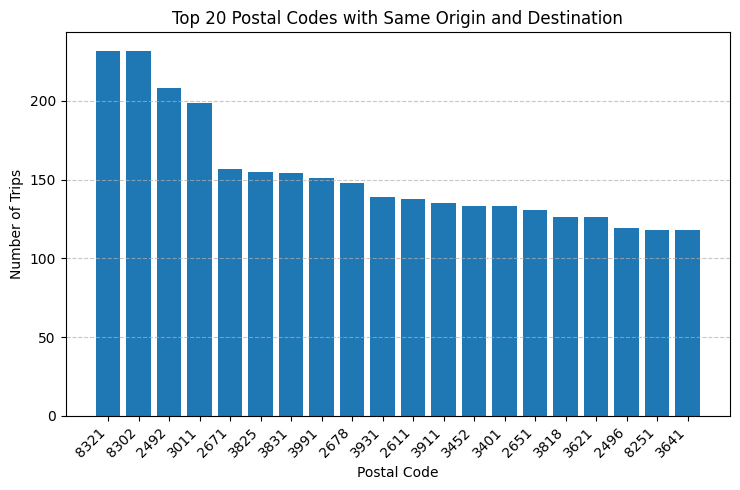

In [61]:
# Count trips with same postal codes
same_postal_codes_df = filtered_df_nonserial_moves[
    filtered_df_nonserial_moves['postal_code_of_departure_point'] ==
    filtered_df_nonserial_moves['arrival_point_postal_code']
].copy()

# Count occurrences of each postal code
postal_code_counts = same_postal_codes_df['postal_code_of_departure_point'].value_counts(
).reset_index()
postal_code_counts.columns = ['postal_code', 'count']

# Sort by count in descending order
postal_code_counts = postal_code_counts.sort_values(
    by='count', ascending=False)

# Plot top 20 postal codes
plt.figure(figsize=(7.5, 5))
top_n = 20
top_postal_codes = postal_code_counts.head(top_n)
plt.bar(top_postal_codes['postal_code'].astype(str), top_postal_codes['count'])
plt.title(f'Top {top_n} Postal Codes with Same Origin and Destination')
plt.xlabel('Postal Code')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Print total number of same postal code trips
print(
    f"Total trips with same origin and destination postal code: {len(same_postal_codes_df)}")
print(
    f"Number of unique postal codes with same origin and destination: {len(postal_code_counts)}")

lets check the feature indicating whether the departure point is the same as the arrival point


In [62]:
df_persons

,person_id,person_index,unique_id_for_each_op,sampling_indicator,number_of_people_in_household,household_composition,place_op_in_household_compared_to_household_core,number_of_household_members_under_6_years_of_age,number_of_household_members_aged_6_to_11,number_of_household_members_aged_12_to_17,number_of_household_members_aged_18_or_older,postal_code_residential_address,neighborhood_combination_amsterdam,amsterdam_metropolitan_region,metropolitan_region_rotterdam_the_hague,province_of_utrecht,gender_op,age_op,age_class_op,migration_background_op,paid_work_op,unpaid_activity_op,social_participation_op,highest_completed_op_education,household_disposable_income_(10%_groups),standardized_household_disposable_income_(10%_groups),deviation_from_low-income_limit,deviation_from_social_minimum,household_prosperity_(10%_groups),number_of_car_licenses_in_household,number_of_motorcycle_licenses_in_household,number_of_moped_licenses_in_household,op_has_a_driving_license_for_a_car,op_possesses_a_motorcycle_license,op_possesses_a_moped_driving_license,number_of_passenger_cars_in_household,number_of_passenger_cars_leased_or_registered_in_the_name_of_a_company_in_the_household,number_of_passenger_cars_registered_in_op's_name,first_fuel_for_youngest_passenger_car_in_household_name,"second_fuel,_youngest_passenger_car_in_household_name","type_of_electric_car,_youngest_passenger_car_in_household_name",year_of_manufacture_of_youngest_passenger_car_in_household_name,year_of_construction_class_of_youngest_passenger_car_in_household_name,weight_class_of_youngest_passenger_car_in_household_name,registration_of_youngest_passenger_car_in_household_name,first_fuel_second_youngest_passenger_car_in_household_name,second_fuel_second_youngest_passenger_car_in_household_name,type_of_electric_car_second_youngest_passenger_car_in_household_name,year_of_construction_second_to_youngest_passenger_car_in_household_name,year_of_construction_class_second_youngest_passenger_car_in_household_name,weight_class_second_youngest_passenger_car_in_household_name,registration_of_the_second_youngest_passenger_car_in_the_name_of_the_household,first_fuel_lease_car_or_passenger_car_in_company_name_in_household,second_fuel_lease_car_or_passenger_car_in_the_name_of_a_company_in_the_household,"type_of_electric_car,_lease_car_or_passenger_car_in_the_name_of_company_in_household",year_of_construction_of_lease_car_or_passenger_car_in_the_name_of_company_in_household,year_of_construction_class_lease_car_or_passenger_car_in_the_name_of_company_in_household,weight_class_lease_car_or_passenger_car_in_the_name_of_company_in_household,number_of_motorcycles_in_household,number_of_engines_in_op_name,number_of_mopeds_in_household,number_of_mopeds_in_op's_name,number_of_mopeds_in_household_name,number_of_mopeds_in_the_name_op,electric_bicycle_in_household,household_ownership_of_means_of_transport,ownership_of_means_of_transport_op,frequency_of_walking/running_outdoors,frequency_of_use_of_non-electric_bicycle,frequency_of_use_of_electric_bicycle,"frequency_of_use_of_bus,_tram_and/or_metro",frequency_of_train_use,frequency_of_using_car_as_driver,frequency_of_using_car_as_passenger,frequency_of_moped_and/or_light_moped_use,frequency_of_motor_use,op_has_a_student_ov_chip_card,mode_of_transport_with_the_most_kilometers_to_work,receives_reimbursement_from_employer_for_travel_to_work,travel_allowance_is_a_fixed_amount_per_period,reimbursement_per_actual_kilometer_driven,reimbursement_of_fuel_costs,reimbursement_of_public_transport_subscription_or_public_transport_trips,reimbursement_of_purchase_costs_of_means_of_transport,leased_vehicle_or_employer's_company_vehicle,reimbursement_is_a_mobility_budget,parking_costs,storage_costs,other_compensation,"work_location,_how_often_can_you_reach_it_if_you_want_to_go_there?",reason_a_cannot_always_reach_work_location,reason_b_not_always_able_to_reach_work_location,"educational_location,_how_often_can_you_reach_it_if_you_want_to_go_there?",reason_a_cannot_always

In [63]:
same_postal_codes_df

,movement_id,person_index,activity_duration_(in_minutes),travel_time_in_the_netherlands_(in_minutes),timestamp_departure,main_mode_of_transport_class_movement,timestamp_arrival,postal_code_of_departure_point,arrival_point_postal_code,departure_location_relocation,the_departure_point_of_the_movement_is_the_arrival_point,district_destination,district_arrival
0,0,2,55.0,5,2022-07-26 10:45:00,5,2022-07-26 10:50:00,9481,9481,1,0,Tynaarlo,Tynaarlo
1,1,2,150.0,15,2022-07-26 11:45:00,5,2022-07-26 12:00:00,9481,9481,4,0,Tynaarlo,Tynaarlo
2,2,2,NaN,114,2022-07-26 14:30:00,5,2022-07-26 16:24:00,9481,9481,1,1,Tynaarlo,Tynaarlo
8,8,7,NaN,210,2022-11-12 13:00:00,5,2022-11-12 16:30:00,3314,3314,1,1,Dordrecht,Dordrecht
22,22,12,20.0,10,2022-10-04 14:00:00,5,2022-10-04 14:10:00,6511,6511,3,0,Nijmegen,Nijmegen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180557,185160,61952,350.0,5,2022-05-09 08:20:00,2,2022-05-09 08:25:00,1566,1566,1,0,Zaanstad,Zaanstad
180558,185161,61952,150.0,15,2022-05-09 14:15:00,5,2022-05-09 14:30:00,1566,1566,4,0,Zaanstad,Zaanstad
180559,185162,61952,NaN,10,2022-05-09 17:00:00,6,2022-05-09 17:10:00,1566,1566,4,0,Zaanstad,Zaanstad
180562,185165,61953,18.0,7,2022-12-08 16:50:00,6,2022-12-08 16:57:00,1506,1506,1,0,Zaanstad,Zaanstad


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Total trips with same origin and destination postal code: 64502
Number of unique postal codes with same origin and destination: 40


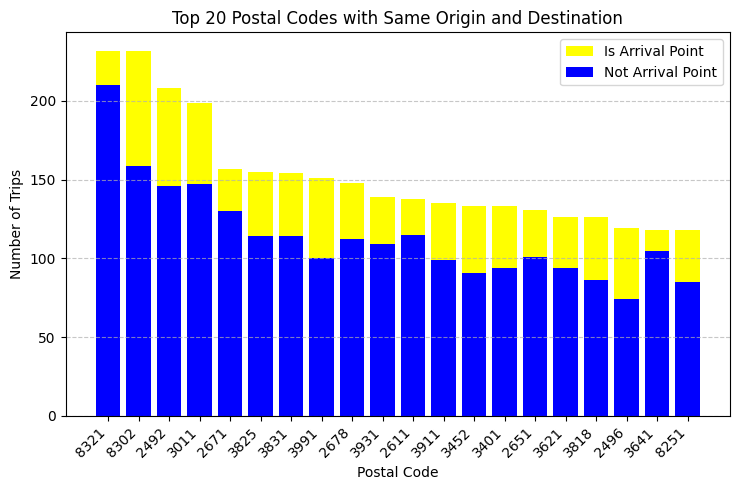

In [64]:
# Count trips with same postal codes
from matplotlib.patches import Patch
same_postal_codes_df = filtered_df_nonserial_moves[
    filtered_df_nonserial_moves['postal_code_of_departure_point'] ==
    filtered_df_nonserial_moves['arrival_point_postal_code']
].copy()

# Count occurrences of each postal code and their arrival point status
postal_code_counts = same_postal_codes_df.groupby(['postal_code_of_departure_point',
                                                   'the_departure_point_of_the_movement_is_the_arrival_point']).size().reset_index(name='count')
postal_code_counts.columns = ['postal_code', 'is_arrival_point', 'count']

# Sort by total count for each postal code in descending order
postal_code_totals = postal_code_counts.groupby(
    'postal_code')['count'].sum().reset_index()
postal_code_totals = postal_code_totals.sort_values(
    by='count', ascending=False)
top_n = 20
top_postal_codes = postal_code_totals.head(top_n)['postal_code']

# Filter postal_code_counts to only include top postal codes
postal_code_counts = postal_code_counts[postal_code_counts['postal_code'].isin(
    top_postal_codes)]

# Plot top 20 postal codes
plt.figure(figsize=(7.5, 5))

# Create stacked bars
bottom = np.zeros(len(top_postal_codes))
for is_arrival in [0, 1]:
    mask = postal_code_counts['is_arrival_point'] == is_arrival
    data = postal_code_counts[mask].set_index(
        'postal_code').reindex(top_postal_codes)['count'].fillna(0)
    color = 'yellow' if is_arrival == 1 else 'blue'
    plt.bar(top_postal_codes.astype(str), data, bottom=bottom, color=color)
    bottom += data

plt.title(f'Top {top_n} Postal Codes with Same Origin and Destination')
plt.xlabel('Postal Code')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
legend_elements = [Patch(facecolor='yellow', label='Is Arrival Point'),
                   Patch(facecolor='blue', label='Not Arrival Point')]
plt.legend(handles=legend_elements)

# Print total number of same postal code trips
print(
    f"Total trips with same origin and destination postal code: {len(same_postal_codes_df)}")
print(
    f"Number of unique postal codes with same origin and destination: {len(postal_code_counts)}")

In [65]:
gdf_cities

,geo_point_2d,pc4_code,year,gem_code,prov_code,prov_name,gem_name,geometry
4,"{ ""lon"": 5.1324759122500003, ""lat"": 52.1084854...",3571,2020,344,26,Utrecht,Utrecht,"POLYGON ((5.14233 52.11459, 5.14233 52.11458, ..."
7,"{ ""lon"": 5.34679409614, ""lat"": 52.154999932599...",3819,2020,307,26,Utrecht,Amersfoort,"POLYGON ((5.34986 52.1612, 5.3499 52.16117, 5...."
34,"{ ""lon"": 5.4735614380299999, ""lat"": 51.4811314...",5628,2020,772,30,Noord-Brabant,Eindhoven,"POLYGON ((5.48966 51.48605, 5.48968 51.48599, ..."
35,"{ ""lon"": 5.5039585084200002, ""lat"": 51.4270868...",5643,2020,772,30,Noord-Brabant,Eindhoven,"MULTIPOLYGON (((5.50507 51.42083, 5.50507 51.4..."
111,"{ ""lon"": 4.3135973423899996, ""lat"": 52.0539161...",2524,2020,518,28,Zuid-Holland,'s-Gravenhage,"MULTIPOLYGON (((4.32156 52.05519, 4.32186 52.0..."
...,...,...,...,...,...,...,...,...
3971,"{ ""lon"": 4.5044130076600002, ""lat"": 51.9111468...",3071,2020,599,28,Zuid-Holland,Rotterdam,"POLYGON ((4.51663 51.91168, 4.51677 51.91138, ..."
3975,"{ ""lon"": 4.3940797123699999, ""lat"": 51.8851919...",3195,2020,599,28,Zuid-Holland,Rotterdam,"MULTIPOLYGON (((4.37422 51.89674, 4.37421 51.8..."
4002,"{ ""lon"": 5.4990218282300001, ""lat"": 51.4927636...",5633,2020,772,30,Noord-Brabant,Eindhoven,"POLYGON ((5.51252 51.4975, 5.51257 51.49749, 5..."
4003,"{ ""lon"": 5.5163049256400001, ""lat"": 51.4390680...",5642,2020,772,30,Noord-Brabant,Eindhoven,"POLYGON ((5.50832 51.44546, 5.50857 51.44543, ..."


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

Total trips with same origin and destination postal code in cities: 10940
Total trips in cities: 40964
Number of unique city postal codes with same origin and destination: 40


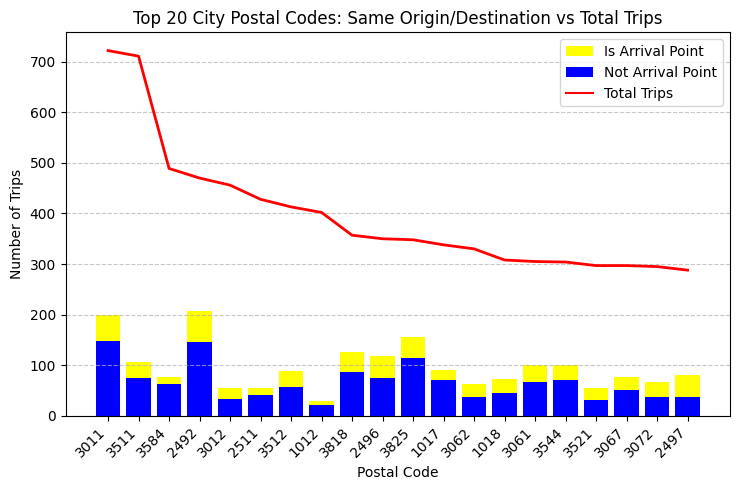

In [66]:
# Filter postal codes to only include those in gdf_cities
from matplotlib.patches import Patch
city_postal_codes = gdf_cities['pc4_code'].unique()

# Filter both dataframes to only include city postal codes
city_same_postal_codes_df = same_postal_codes_df[
    same_postal_codes_df['postal_code_of_departure_point'].isin(
        city_postal_codes)
].copy()

city_nonserial_df = filtered_df_nonserial_moves[
    filtered_df_nonserial_moves['postal_code_of_departure_point'].isin(
        city_postal_codes)
].copy()

# Count occurrences for same postal codes
city_same_postal_counts = city_same_postal_codes_df.groupby([
    'postal_code_of_departure_point',
    'the_departure_point_of_the_movement_is_the_arrival_point'
]).size().reset_index(name='count')
city_same_postal_counts.columns = ['postal_code', 'is_arrival_point', 'count']

# Count total trips per postal code from nonserial df
city_total_counts = city_nonserial_df.groupby(
    'postal_code_of_departure_point').size().reset_index(name='total_count')
city_total_counts.columns = ['postal_code', 'total_count']

# Sort by total count for each postal code in descending order
city_total_counts = city_total_counts.sort_values(
    by='total_count', ascending=False)
top_n = 20
top_city_postal_codes = city_total_counts.head(top_n)['postal_code']

# Filter counts to only include top city postal codes
city_same_postal_counts = city_same_postal_counts[city_same_postal_counts['postal_code'].isin(
    top_city_postal_codes)]
city_total_counts = city_total_counts[city_total_counts['postal_code'].isin(
    top_city_postal_codes)]

# Plot top 20 city postal codes
plt.figure(figsize=(7.5, 5))

# Create stacked bars
bottom = np.zeros(len(top_city_postal_codes))
for is_arrival in [0, 1]:
    mask = city_same_postal_counts['is_arrival_point'] == is_arrival
    data = city_same_postal_counts[mask].set_index(
        'postal_code').reindex(top_city_postal_codes)['count'].fillna(0)
    color = 'yellow' if is_arrival == 1 else 'blue'
    plt.bar(top_city_postal_codes.astype(str),
            data, bottom=bottom, color=color)
    bottom += data

# Add total trips as a line plot
plt.plot(top_city_postal_codes.astype(str),
         city_total_counts.set_index('postal_code').reindex(
             top_city_postal_codes)['total_count'],
         'r-', label='Total Trips', linewidth=2)

plt.title(
    f'Top {top_n} City Postal Codes: Same Origin/Destination vs Total Trips')
plt.xlabel('Postal Code')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
legend_elements = [Patch(facecolor='yellow', label='Is Arrival Point'),
                   Patch(facecolor='blue', label='Not Arrival Point'),
                   plt.Line2D([0], [0], color='red', label='Total Trips')]
plt.legend(handles=legend_elements)

# Print statistics
print(
    f"Total trips with same origin and destination postal code in cities: {len(city_same_postal_codes_df)}")
print(f"Total trips in cities: {len(city_nonserial_df)}")
print(
    f"Number of unique city postal codes with same origin and destination: {len(city_same_postal_counts)}")

In [67]:
filtered_df_nonserial_moves[["arrival_point_postal_code",
                             "postal_code_of_departure_point", "district_destination", "district_arrival"]]

,arrival_point_postal_code,postal_code_of_departure_point,district_destination,district_arrival
0,9481,9481,Tynaarlo,Tynaarlo
1,9481,9481,Tynaarlo,Tynaarlo
2,9481,9481,Tynaarlo,Tynaarlo
3,9301,9482,Tynaarlo,Noordenveld
4,9482,9301,Noordenveld,Tynaarlo
...,...,...,...,...
180561,1506,1032,Amsterdam,Zaanstad
180562,1506,1506,Zaanstad,Zaanstad
180563,1506,1506,Zaanstad,Zaanstad
180564,1509,1506,Zaanstad,Zaanstad


In [68]:
# Create counts for departure and arrival postal codes
departure_counts = filtered_df_nonserial_moves['postal_code_of_departure_point'].value_counts(
)
arrival_counts = filtered_df_nonserial_moves['arrival_point_postal_code'].value_counts(
)

# Get unique postal codes from both departure and arrival
all_postal_codes = sorted(set(departure_counts.index)
                          | set(arrival_counts.index))

# Create a DataFrame with all postal codes
postal_code_stats = pd.DataFrame({'postal_code': all_postal_codes})

# Add departure and arrival counts
postal_code_stats['departure_count'] = postal_code_stats['postal_code'].map(
    departure_counts)
postal_code_stats['arrival_count'] = postal_code_stats['postal_code'].map(
    arrival_counts)

# Create district mappings from the original DataFrame
district_mapping = filtered_df_nonserial_moves.drop_duplicates('postal_code_of_departure_point')[
    ['postal_code_of_departure_point', 'district_destination']
].set_index('postal_code_of_departure_point')['district_destination']

# Add district information
postal_code_stats['district'] = postal_code_stats['postal_code'].map(
    district_mapping)

# Fill NaN values with 0 for counts and 'Unknown' for district
postal_code_stats = postal_code_stats.fillna(
    {'departure_count': 0, 'arrival_count': 0, 'district': 'Unknown'})
postal_code_stats['total_count'] = postal_code_stats['departure_count'] + \
    postal_code_stats['arrival_count']

# Sort by total count in descending order
postal_code_stats = postal_code_stats.sort_values(
    'total_count', ascending=False)

In [69]:
postal_code_stats.head(20)

,postal_code,departure_count,arrival_count,district,total_count
1067,3511,711.0,724.0,Utrecht,1435.0
818,3011,722.0,704.0,Rotterdam,1426.0
1107,3584,489.0,463.0,Utrecht,952.0
622,2492,470.0,469.0,'s-Gravenhage,939.0
819,3012,456.0,429.0,Rotterdam,885.0
3034,8302,433.0,433.0,Noordoostpolder,866.0
628,2511,428.0,427.0,'s-Gravenhage,855.0
1068,3512,413.0,417.0,Utrecht,830.0
682,2611,404.0,420.0,Delft,824.0
1,1012,402.0,385.0,Amsterdam,787.0


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0) Your list of target districts
# CITIES = [...]

# 1) PC4 codes for those districts
city_postcodes = (
    gdf_netherlands
    .loc[gdf_netherlands['gem_name'].isin(CITIES), 'pc4_code']
    .astype(str)
    .unique()
)

# 2) Filter trips that start OR end in those PC4s
trips_for_cities = filtered_df_nonserial_moves[
    filtered_df_nonserial_moves['postal_code_of_departure_point'].astype(str).isin(city_postcodes) |
    filtered_df_nonserial_moves['arrival_point_postal_code'].astype(
        str).isin(city_postcodes)
].copy()

# 3) Merge in origin/dest district names (LEFT joins)
trips_with_districts = (
    trips_for_cities
    .merge(
        gdf_netherlands[['gem_name', 'pc4_code']],
        left_on='postal_code_of_departure_point',
        right_on='pc4_code',
        how='left'
    )
    .merge(
        gdf_netherlands[['gem_name', 'pc4_code']],
        left_on='arrival_point_postal_code',
        right_on='pc4_code',
        how='left',
        suffixes=('_origin', '_dest')
    )
)

# 4) Initialize stats indexed by CITIES
district_stats = pd.DataFrame(index=CITIES)

# Total departures & arrivals
district_stats['total_departure_trips'] = (
    trips_with_districts.groupby('gem_name_origin').size()
    .reindex(CITIES, fill_value=0).astype(int)
)
district_stats['total_arrival_trips'] = (
    trips_with_districts.groupby('gem_name_dest').size()
    .reindex(CITIES, fill_value=0).astype(int)
)

# Net flow
district_stats['net_flow'] = (
    district_stats['total_arrival_trips']
    - district_stats['total_departure_trips']
)

# Intra‑district trips
intra_mask = trips_with_districts['gem_name_origin'] == trips_with_districts['gem_name_dest']
intra = trips_with_districts[intra_mask]
district_stats['intra_district_trips'] = (
    intra.groupby('gem_name_origin').size()
    .reindex(CITIES, fill_value=0).astype(int)
)

# Same‑PC trips
same_pc_mask = intra_mask & (
    trips_with_districts['postal_code_of_departure_point']
    == trips_with_districts['arrival_point_postal_code']
)
same_pc = trips_with_districts[same_pc_mask]
district_stats['same_postal_code_trips'] = (
    same_pc.groupby('gem_name_origin').size()
    .reindex(CITIES, fill_value=0).astype(int)
)

# Roundtrip flag
marked_mask = same_pc_mask & (
    trips_with_districts['the_departure_point_of_the_movement_is_the_arrival_point']
)
marked = trips_with_districts[marked_mask]
district_stats['roundtrip_flag'] = (
    marked.groupby('gem_name_origin').size()
    .reindex(CITIES, fill_value=0).astype(int)
)

# Different‑PC trips
district_stats['different_postal_code_trips'] = (
    district_stats['intra_district_trips']
    - district_stats['same_postal_code_trips']
)

# Unique intra‑PCs
unique_intra = (
    intra.groupby('gem_name_origin')
         .apply(lambda df: pd.unique(
             df[['postal_code_of_departure_point', 'arrival_point_postal_code']]
             .values.ravel()
         ).size)
)
district_stats['unique_intra_postal_codes'] = (
    unique_intra.reindex(CITIES, fill_value=0).astype(int)
)

# Inter‑district trips
district_stats['inter_district_trips'] = (
    district_stats['total_departure_trips']
    - district_stats['intra_district_trips']
)

# Count outside postal codes for each city
outside_pc_mask = (
    (trips_with_districts['gem_name_origin'].isin(CITIES) & ~trips_with_districts['gem_name_dest'].isin(CITIES)) |
    (trips_with_districts['gem_name_dest'].isin(CITIES) &
     ~trips_with_districts['gem_name_origin'].isin(CITIES))
)
outside_trips = trips_with_districts[outside_pc_mask]

# Get unique outside postal codes for each city
outside_pc_counts = {}
for city in CITIES:
    # Get trips where city is origin
    city_origin_trips = outside_trips[outside_trips['gem_name_origin'] == city]
    city_dest_trips = outside_trips[outside_trips['gem_name_dest'] == city]

    # Get unique postal codes
    origin_pcs = set(city_origin_trips['arrival_point_postal_code'].unique())
    dest_pcs = set(city_dest_trips['postal_code_of_departure_point'].unique())

    # Combine and count
    outside_pc_counts[city] = len(origin_pcs | dest_pcs)

district_stats['unique_outside_postal_codes'] = pd.Series(outside_pc_counts)

# 5) Percentages of intra
with np.errstate(divide='ignore', invalid='ignore'):
    # Calculate mean total trips (departure + arrival) / 2
    district_stats['mean_total_trips'] = (
        (district_stats['total_departure_trips'] +
         district_stats['total_arrival_trips']) / 2
    ).round(1)

    # Calculate intra district percentage based on mean total trips
    district_stats['intra_district_pct'] = (
        district_stats['intra_district_trips'] /
        district_stats['mean_total_trips'] * 100
    ).round(1).fillna(0)

    district_stats['same_postal_code_pct'] = (
        district_stats['same_postal_code_trips']
        / district_stats['intra_district_trips'] * 100
    ).round(1).fillna(0)
    district_stats['roundtrip_flag_pct'] = (
        district_stats['roundtrip_flag']
        / district_stats['intra_district_trips'] * 100
    ).round(1).fillna(0)

# 6) Trips per intra‑PC
with np.errstate(divide='ignore', invalid='ignore'):
    district_stats['trips_per_pc_intra'] = (
        district_stats['intra_district_trips']
        / district_stats['unique_intra_postal_codes']
    ).round(1).fillna(0)

    # Add balanced score calculation
    district_stats['balanced_score'] = (
        (1 - district_stats['same_postal_code_pct'] / 100) *
        district_stats['trips_per_pc_intra']
    ).round(1).fillna(0)

# 7) Final reorder & sort by balanced_score
column_order = [
    'total_departure_trips',
    'total_arrival_trips',
    'mean_total_trips',
    'net_flow',
    'intra_district_trips',
    'intra_district_pct',
    'same_postal_code_trips',
    'same_postal_code_pct',
    'roundtrip_flag',
    'roundtrip_flag_pct',
    'different_postal_code_trips',
    'inter_district_trips',
    'unique_intra_postal_codes',
    'unique_outside_postal_codes',  # Added new column
    'trips_per_pc_intra',
    'balanced_score'
]
district_stats = (
    district_stats[column_order]
    .sort_values('balanced_score', ascending=False)
)

In [76]:
district_stats.head(20)

,total_departure_trips,total_arrival_trips,mean_total_trips,net_flow,intra_district_trips,intra_district_pct,same_postal_code_trips,same_postal_code_pct,roundtrip_flag,roundtrip_flag_pct,different_postal_code_trips,inter_district_trips,unique_intra_postal_codes,unique_outside_postal_codes,trips_per_pc_intra,balanced_score
Utrecht,8118,8137,8127.5,19,5637,69.4,2284,40.5,824,14.6,3353,2481,46,736,122.5,72.9
Amersfoort,3057,3069,3063.0,12,2231,72.8,1059,47.5,366,16.4,1172,826,18,367,123.9,65.0
's-Gravenhage,8776,8747,8761.5,-29,6371,72.7,2408,37.8,1046,16.4,3963,2405,62,520,102.8,63.9
Rotterdam,9921,9873,9897.0,-48,7223,73.0,2556,35.4,1017,14.1,4667,2698,76,683,95.0,61.4
Amsterdam,8697,8709,8703.0,12,5753,66.1,1951,33.9,764,13.3,3802,2944,80,780,71.9,47.5
Eindhoven,2395,2389,2392.0,-6,1680,70.2,682,40.6,279,16.6,998,715,33,309,50.9,30.2


In [ ]:
# Create a dataframe with trips to/from/within Utrecht
utrecht_trips = filtered_df_nonserial_moves[
    (filtered_df_nonserial_moves['district_destination'] == 'Utrecht') |
    (filtered_df_nonserial_moves['district_arrival'] == 'Utrecht')
].copy()

# Count unique postal codes for both departure and arrival points
unique_departure_pcs = utrecht_trips['postal_code_of_departure_point'].nunique(
)
unique_arrival_pcs = utrecht_trips['arrival_point_postal_code'].nunique()
unique_pcs_total = pd.concat([
    utrecht_trips['postal_code_of_departure_point'],
    utrecht_trips['arrival_point_postal_code']
]).nunique()

# Display summary statistics
print(f"Total number of trips involving Utrecht: {len(utrecht_trips)}")
print(f"\nUnique postal codes in departure points: {unique_departure_pcs}")
print(f"Unique postal codes in arrival points: {unique_arrival_pcs}")
print(f"Total unique postal codes across all trips: {unique_pcs_total}")

# Display first few rows
utrecht_trips.head()

Total number of trips involving Utrecht: 10618

Unique postal codes in departure points: 671
Unique postal codes in arrival points: 676
Total unique postal codes across all trips: 783


,movement_id,person_index,activity_duration_(in_minutes),travel_time_in_the_netherlands_(in_minutes),timestamp_departure,main_mode_of_transport_class_movement,timestamp_arrival,postal_code_of_departure_point,arrival_point_postal_code,departure_location_relocation,the_departure_point_of_the_movement_is_the_arrival_point,district_destination,district_arrival
63,65,25,20.0,10,2022-10-07 09:30:00,5,2022-10-07 09:40:00,3531,3531,1,0,Utrecht,Utrecht
64,66,25,5.0,5,2022-10-07 10:00:00,5,2022-10-07 10:05:00,3531,3531,3,0,Utrecht,Utrecht
65,67,25,NaN,17,2022-10-07 10:10:00,5,2022-10-07 10:27:00,3531,3531,3,1,Utrecht,Utrecht
68,70,27,520.0,20,2022-04-07 07:30:00,1,2022-04-07 07:50:00,3562,3723,1,0,Utrecht,De Bilt
69,71,27,25.0,35,2022-04-07 16:30:00,1,2022-04-07 17:05:00,3723,3562,3,0,De Bilt,Utrecht


In [72]:
district_stats.drop(columns=[col for col in district_stats.columns if col.endswith(
    '_pct')] + ['different_postal_code_trips', 'inter_district_trips']).head(20)

,total_departure_trips,total_arrival_trips,mean_total_trips,net_flow,intra_district_trips,same_postal_code_trips,roundtrip_flag,unique_intra_postal_codes,trips_per_pc_intra,balanced_score
Utrecht,8118,8137,8127.5,19,5637,2284,824,46,122.5,72.9
Amersfoort,3057,3069,3063.0,12,2231,1059,366,18,123.9,65.0
's-Gravenhage,8776,8747,8761.5,-29,6371,2408,1046,62,102.8,63.9
Rotterdam,9921,9873,9897.0,-48,7223,2556,1017,76,95.0,61.4
Amsterdam,8697,8709,8703.0,12,5753,1951,764,80,71.9,47.5
Eindhoven,2395,2389,2392.0,-6,1680,682,279,33,50.9,30.2


##### verify travel duration and data inconsistencies with "travel*time_in_the_netherlands*(in_minutes)"


In [43]:
filtered_df_nonserial_moves

,movement_id,person_index,activity_duration_(in_minutes),travel_time_in_the_netherlands_(in_minutes),timestamp_departure,main_mode_of_transport_class_movement,timestamp_arrival,postal_code_of_departure_point,arrival_point_postal_code,departure_location_relocation,the_departure_point_of_the_movement_is_the_arrival_point,district_destination,district_arrival
0,0,2,55.0,5,2022-07-26 10:45:00,5,2022-07-26 10:50:00,9481,9481,1,0,Tynaarlo,Tynaarlo
1,1,2,150.0,15,2022-07-26 11:45:00,5,2022-07-26 12:00:00,9481,9481,4,0,Tynaarlo,Tynaarlo
2,2,2,NaN,114,2022-07-26 14:30:00,5,2022-07-26 16:24:00,9481,9481,1,1,Tynaarlo,Tynaarlo
3,3,4,580.0,20,2022-04-11 06:30:00,1,2022-04-11 06:50:00,9482,9301,1,0,Tynaarlo,Noordenveld
4,4,4,NaN,25,2022-04-11 16:30:00,1,2022-04-11 16:55:00,9301,9482,3,0,Noordenveld,Tynaarlo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180561,185164,61953,19.0,35,2022-12-08 15:56:00,1,2022-12-08 16:31:00,1032,1506,4,0,Amsterdam,Zaanstad
180562,185165,61953,18.0,7,2022-12-08 16:50:00,6,2022-12-08 16:57:00,1506,1506,1,0,Zaanstad,Zaanstad
180563,185166,61953,60.0,5,2022-12-08 17:15:00,6,2022-12-08 17:20:00,1506,1506,4,0,Zaanstad,Zaanstad
180564,185167,61953,30.0,15,2022-12-08 18:20:00,1,2022-12-08 18:35:00,1506,1509,1,0,Zaanstad,Zaanstad


In [44]:
# Count entries where departure and arrival time stamps are not the same
different_time_stamps_count = filtered_df_nonserial_moves[filtered_df_nonserial_moves[
    'timestamp_departure'] != filtered_df_nonserial_moves['timestamp_arrival']].shape[0]

# Print the result
print(
    f"Number of entries with different departure and arrival time stamps: {different_time_stamps_count}")
print("Ratio of different time stamps: ",
      different_time_stamps_count / len(filtered_df_nonserial_moves))

Number of entries with different departure and arrival time stamps: 180566
Ratio of different time stamps:  1.0


In [45]:
# check for all trips
filtered_df_nonserial_moves = verify_travel_duration(
    filtered_df_nonserial_moves)

# check for trips with differentiating arrival and departure points and timestamps
different_locations_df = verify_travel_duration(different_locations_df)

In [46]:
# Create a dataframe with duration mismatches
duration_mismatch_df = get_duration_mismatches(different_locations_df)
filtered_df_nonserial_moves = get_duration_mismatches(
    filtered_df_nonserial_moves)

In [94]:
filtered_df_nonserial_moves.head(5)

,movement_id,person_index,activity_duration_(in_minutes),travel_time_in_the_netherlands_(in_minutes),timestamp_departure,main_mode_of_transport_class_movement,timestamp_arrival,postal_code_of_departure_point,arrival_point_postal_code,departure_location_relocation,the_departure_point_of_the_movement_is_the_arrival_point,district_destination,district_arrival,calculated_duration,duration_matches
11030,11313,3856,246.0,0,2022-01-08 07:40:00,7,2022-01-08 08:24:00,3195,2841,3,0,Rotterdam,Zuidplas,44.0,False
11031,11314,3856,10.0,0,2022-01-08 12:30:00,7,2022-01-08 13:13:00,2841,3195,3,0,Zuidplas,Rotterdam,43.0,False
130062,133431,44572,550.0,0,2022-01-28 06:00:00,7,2022-01-28 06:20:00,8084,8072,3,0,Elburg,Nunspeet,20.0,False
129144,132490,44291,5.0,0,2022-01-28 06:30:00,7,2022-01-28 06:50:00,7261,7141,3,0,Berkelland,Oost Gelre,20.0,False
129145,132491,44291,5.0,0,2022-01-28 06:55:00,7,2022-01-28 07:30:00,7141,7005,3,0,Oost Gelre,Doetinchem,35.0,False


In [95]:
duration_mismatch_df[duration_mismatch_df[
    "travel_time_in_the_netherlands_(in_minutes)"] == 0].head(5)

,movement_id,person_index,activity_duration_(in_minutes),travel_time_in_the_netherlands_(in_minutes),timestamp_departure,main_mode_of_transport_class_movement,timestamp_arrival,postal_code_of_departure_point,arrival_point_postal_code,departure_location_relocation,the_departure_point_of_the_movement_is_the_arrival_point,district_destination,district_arrival,calculated_duration,duration_matches
548,554,204,55.0,0,2022-07-09 11:58:00,7,2022-07-09 12:09:00,8256,8251,3,0,Dronten,Dronten,11.0,False
11030,11313,3856,246.0,0,2022-01-08 07:40:00,7,2022-01-08 08:24:00,3195,2841,3,0,Rotterdam,Zuidplas,44.0,False
11031,11314,3856,10.0,0,2022-01-08 12:30:00,7,2022-01-08 13:13:00,2841,3195,3,0,Zuidplas,Rotterdam,43.0,False
24994,25642,8685,15.0,0,2022-03-24 09:00:00,7,2022-03-24 09:45:00,5405,6591,3,0,Uden,Gennep,45.0,False
24995,25643,8685,145.0,0,2022-03-24 10:00:00,7,2022-03-24 10:50:00,6591,5405,3,0,Gennep,Uden,50.0,False


Number of missing values in departure_location_relocation: 0
Percentage of missing values: 0.00%


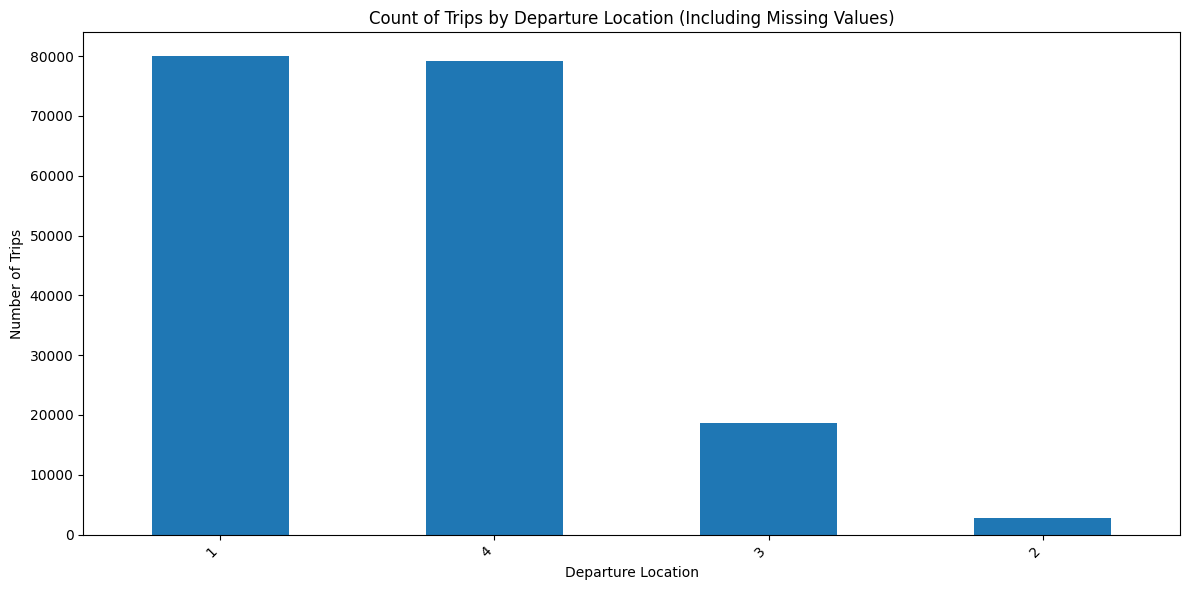

In [49]:
# Check for missing values in departure_location_relocation
missing_values = df_nonserial_moves['departure_location_relocation'].isna(
).sum()
print(
    f"Number of missing values in departure_location_relocation: {missing_values}")
print(
    f"Percentage of missing values: {(missing_values/len(df_nonserial_moves))*100:.2f}%")

# Create value counts for departure_location_relocation (excluding missing values)
departure_location_counts = df_nonserial_moves['departure_location_relocation'].value_counts(
    dropna=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
departure_location_counts.plot(kind='bar')
plt.title('Count of Trips by Departure Location (Including Missing Values)')
plt.xlabel('Departure Location')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df_nonserial_moves is your original DataFrame

# 1) Define mappings for origin, motive, and purpose
origin_map = {
    1: "Own home address",
    2: "Different home address",
    3: "A work address",
    4: "Another address"
}

motive_map = {
    1: "To and from work",
    2: "Business/professional",
    3: "Services/personal care",
    4: "Shopping/grocery",
    5: "Education/course",
    6: "Visitors/staying over",
    7: "Social/recreational",
    8: "Touring/hiking",
    9: "Different motive"
}

purpose_map = {
    1:  "Home",
    2:  "To work",
    3:  "Business visit",
    4:  "Professionally",
    5:  "Pick up/drop off people",
    6:  "Collect/deliver goods",
    7:  "Education/course",
    8:  "Shopping/grocery",
    9:  "Visitors/staying over",
    10: "Touring/hiking",
    11: "Sports/hobbies",
    12: "Other leisure",
    13: "Services/personal care",
    14: "Different purpose"
}

# 2) Copy and map labels into the DataFrame
df = df_nonserial_moves.copy()
df['origin_label'] = df['departure_location_relocation'].map(origin_map)
df['motive_label'] = df['class_division_motif'].map(motive_map)
df['purpose_label'] = df['destination/purpose'].map(purpose_map)

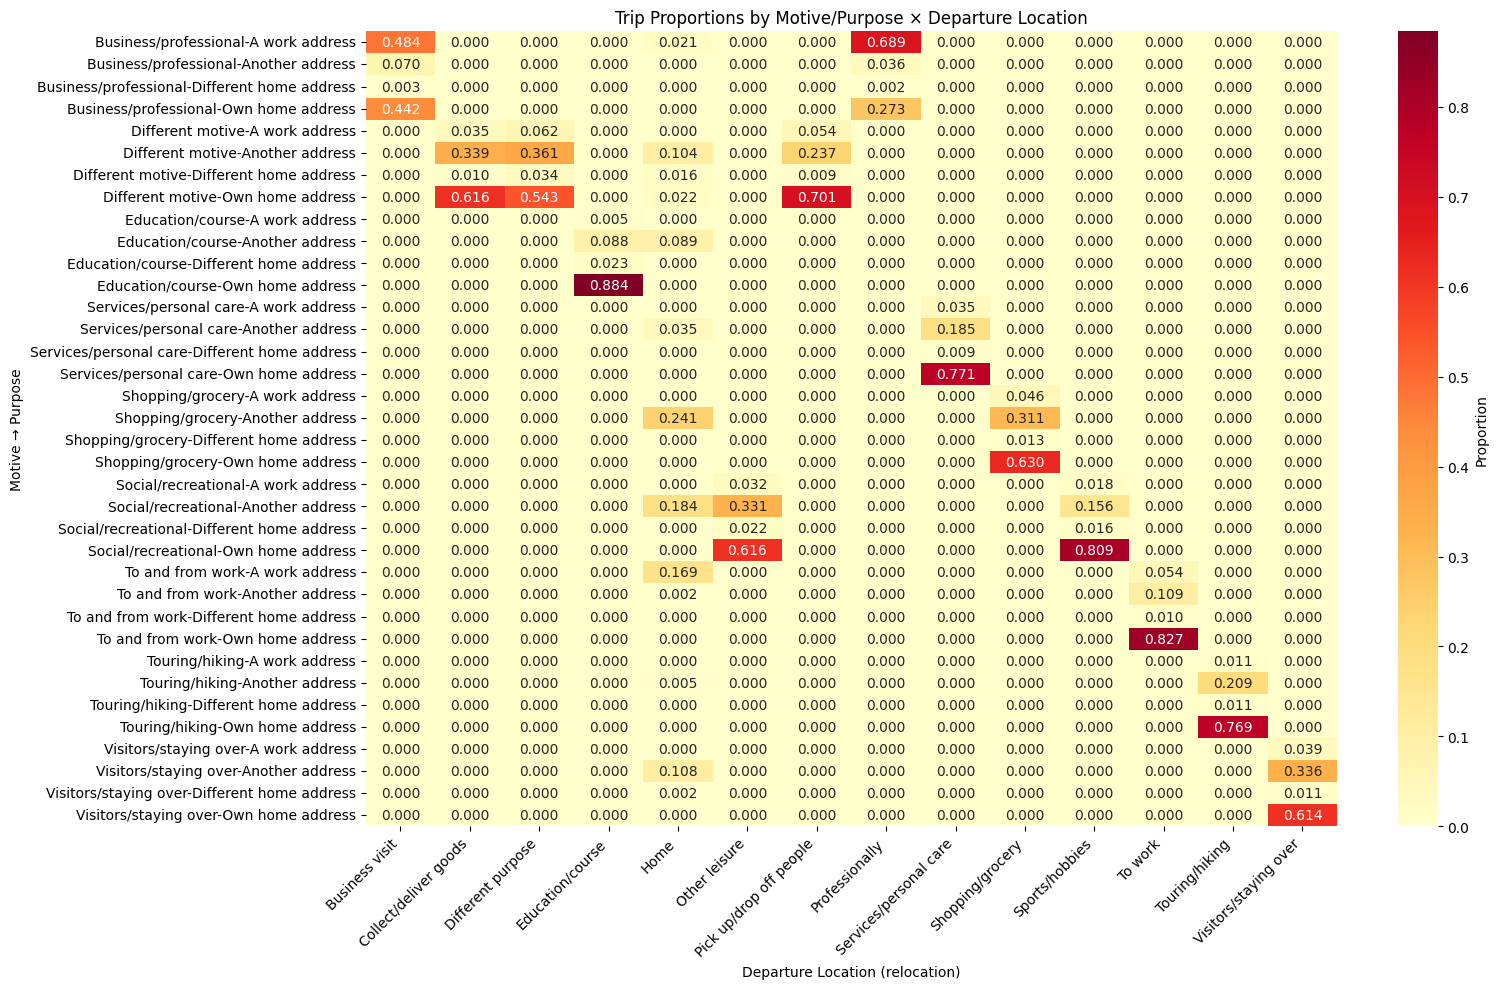

In [52]:
# 3) Build the normalized crosstab: rows=origin, cols=(motive, purpose)
ct = pd.crosstab(
    df['purpose_label'],
    [df['motive_label'], df['origin_label']],
    normalize='index'
).round(3)

# 4) Transpose so origin types become columns
ctT = ct.T

# 5) Plot heatmap with origin on the x‑axis
plt.figure(figsize=(16, 10))
sns.heatmap(
    ctT,
    annot=True,
    fmt=".3f",
    cmap="YlOrRd",
    cbar_kws={"label": "Proportion"}
)
plt.title("Trip Proportions by Motive/Purpose × Departure Location")
plt.xlabel("Departure Location (relocation)")
plt.ylabel("Motive → Purpose")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Number of Home → Work commutes captured: 13,203
Number of Work → Home commutes captured: 12,026
Total trips in that histogram: 25,229


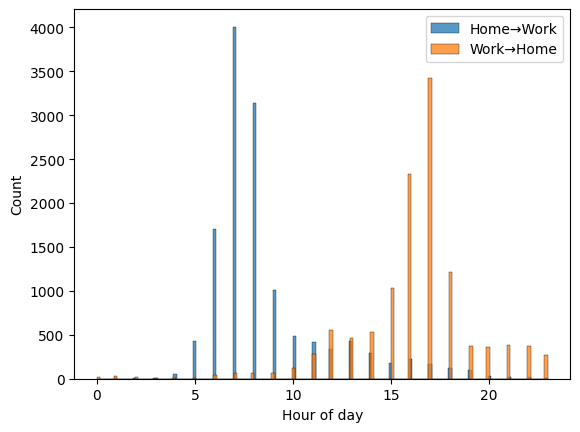

In [53]:
df_home2work = df[
    (df['origin_label'] == 'Own home address') &
    (df['motive_label'] == 'To and from work') &
    (df['purpose_label'] == 'To work')
]
df_work2home = df[
    (df['origin_label'] == 'A work address') &
    (df['motive_label'] == 'To and from work') &
    (df['purpose_label'] == 'Home')
]
sns.histplot(df_home2work['timestamp_departure'].dt.hour,
             label='Home→Work', kde=False)
sns.histplot(df_work2home['timestamp_departure'].dt.hour,
             label='Work→Home', kde=False)
plt.legend()
plt.xlabel('Hour of day')
plt.ylabel('Count')


print(f"Number of Home → Work commutes captured: {len(df_home2work):,}")
print(f"Number of Work → Home commutes captured: {len(df_work2home):,}")
print(
    f"Total trips in that histogram: {len(df_home2work) + len(df_work2home):,}")

In [54]:
df_nonserial_moves[df_nonserial_moves[
    'trip_duration_in_the_netherlands_(in_minutes)'] == 0]

,movement_id,motive,main_mode_of_transport_class_movement,train_ride_departure_station,main_mode_of_transport_travel,trip_id,person_index,nature_of_work,activity_duration_(in_minutes),trip_distance_abroad_(in_hectometers),departure_time_class,removed_all_foreign_relocation,ride_transportation_means,timestamp_departure,new_move,trip_distance_in_the_netherlands_(in_hectometers),unique_id_for_every_move,travel_distance_class_in_the_netherlands,role_in_the_main_mode_of_transportation,visited_several_stores,sequence_of_work_trips,timestamp_arrival,destination/purpose,trip_duration_in_the_netherlands_(in_minutes),correction_of_movements_to_journeys,journey_time_abroad_(in_minutes),travel_duration_class_in_the_netherlands,trip_distance_class_in_the_netherlands,new_person,travel_distance_in_the_netherlands_(in_hectometers),unique_id_for_every_ride,group_size_of_train_travel_group,number_of_journeys_displacement,arrival_point_postal_code,the_departure_point_of_the_movement_is_the_arrival_point,postal_code_of_departure_point,airplane_ride_removed,arrival_station_train_ride,departure_location_relocation,movement_number,number_of_car_occupants,travel_time_in_the_netherlands_(in_minutes),correction_due_to_speed,trip_number,class_division_motif,role_in_the_ride_transportation_vehicle,new_ride,ride_transportation_means_class


In [92]:
# Calculate duration for rows where activity_duration is 0
mask_zero_duration = df_nonserial_moves[
    'travel_time_in_the_netherlands_(in_minutes)'] == 0
df_nonserial_moves.loc[mask_zero_duration, 'travel_time_in_the_netherlands_(in_minutes)'] = (
    pd.to_datetime(df_nonserial_moves.loc[mask_zero_duration, 'timestamp_arrival']) -
    pd.to_datetime(
        df_nonserial_moves.loc[mask_zero_duration, 'timestamp_departure'])
).dt.total_seconds() / 60

In [93]:
df_nonserial_moves[df_nonserial_moves[
    'travel_time_in_the_netherlands_(in_minutes)'] == 0]

,movement_id,motive,main_mode_of_transport_class_movement,train_ride_departure_station,main_mode_of_transport_travel,trip_id,person_index,nature_of_work,activity_duration_(in_minutes),trip_distance_abroad_(in_hectometers),departure_time_class,removed_all_foreign_relocation,ride_transportation_means,timestamp_departure,new_move,trip_distance_in_the_netherlands_(in_hectometers),unique_id_for_every_move,travel_distance_class_in_the_netherlands,role_in_the_main_mode_of_transportation,visited_several_stores,sequence_of_work_trips,timestamp_arrival,destination/purpose,trip_duration_in_the_netherlands_(in_minutes),correction_of_movements_to_journeys,journey_time_abroad_(in_minutes),travel_duration_class_in_the_netherlands,trip_distance_class_in_the_netherlands,new_person,travel_distance_in_the_netherlands_(in_hectometers),unique_id_for_every_ride,group_size_of_train_travel_group,number_of_journeys_displacement,arrival_point_postal_code,the_departure_point_of_the_movement_is_the_arrival_point,postal_code_of_departure_point,airplane_ride_removed,arrival_station_train_ride,departure_location_relocation,movement_number,number_of_car_occupants,travel_time_in_the_netherlands_(in_minutes),correction_due_to_speed,trip_number,class_division_motif,role_in_the_ride_transportation_vehicle,new_ride,ride_transportation_means_class


compare the travel time with the actual travle time class -> does it match


Travel Duration Class Mapping:
Class 0: No regular travel
Class 1: 1 to 5 minutes
Class 2: 5 to 10 minutes
Class 3: 10 to 15 minutes
Class 4: 15 to 20 minutes
Class 5: 20 to 25 minutes
Class 6: 25 to 30 minutes
Class 7: 30 to 45 minutes
Class 8: 45 to 60 minutes
Class 9: 60 to 90 minutes
Class 10: 90 to 120 minutes
Class 11: 120 minutes or more


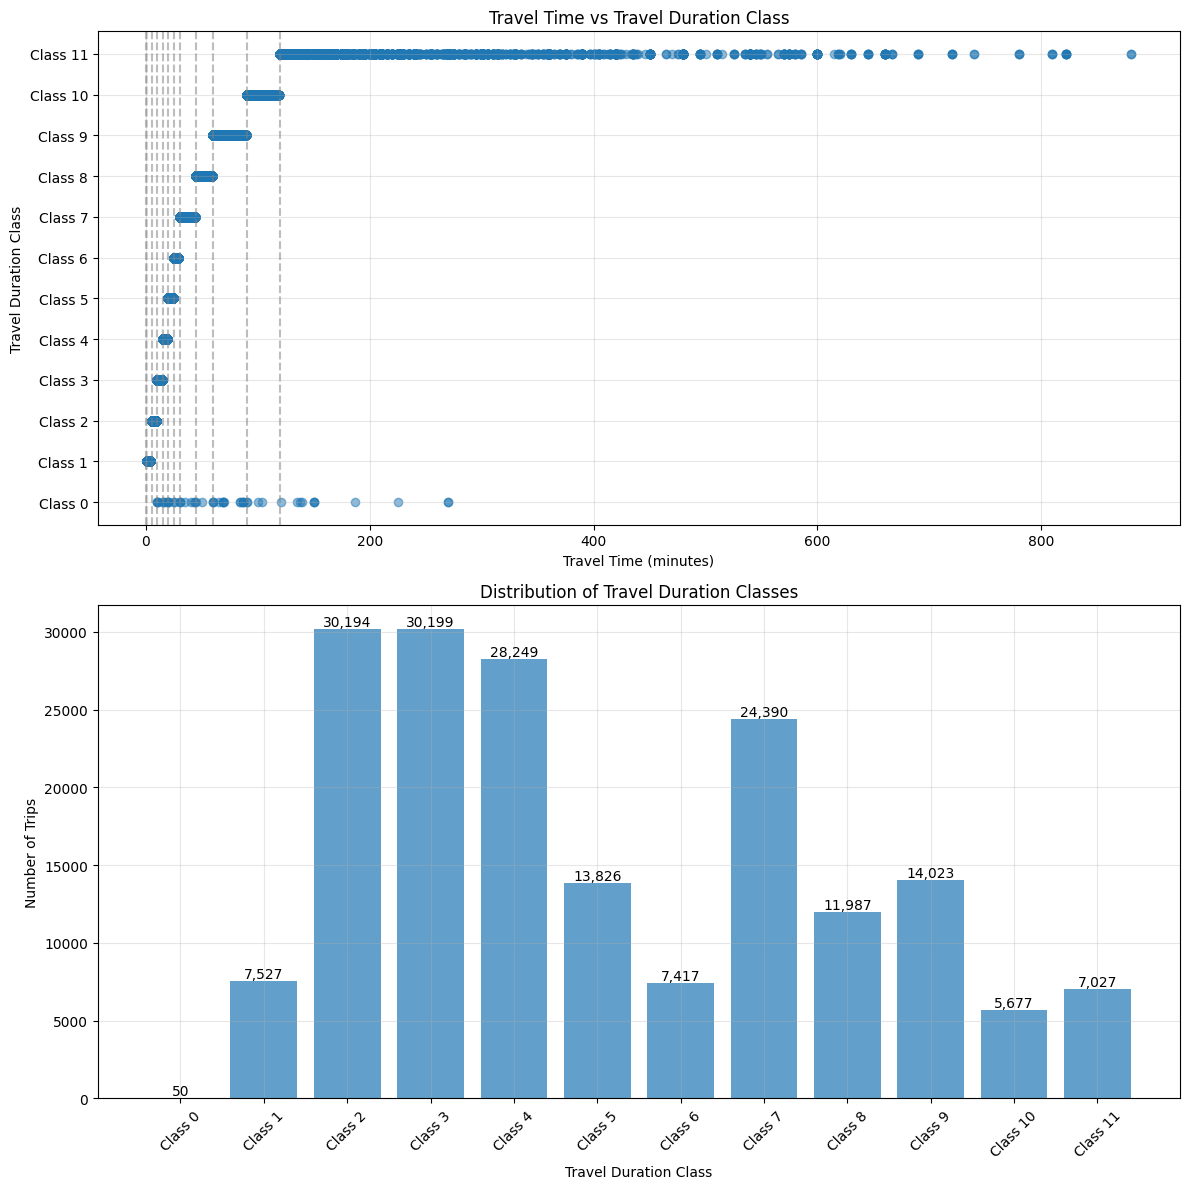


Distribution of Travel Duration Classes:
Class 0 (No regular travel): 50 trips (0.0%)
Class 1 (1-5 minutes): 7,527 trips (4.2%)
Class 2 (5-10 minutes): 30,194 trips (16.7%)
Class 3 (10-15 minutes): 30,199 trips (16.7%)
Class 4 (15-20 minutes): 28,249 trips (15.6%)
Class 5 (20-25 minutes): 13,826 trips (7.7%)
Class 6 (25-30 minutes): 7,417 trips (4.1%)
Class 7 (30-45 minutes): 24,390 trips (13.5%)
Class 8 (45-60 minutes): 11,987 trips (6.6%)
Class 9 (60-90 minutes): 14,023 trips (7.8%)
Class 10 (90-120 minutes): 5,677 trips (3.1%)
Class 11 (120+ minutes): 7,027 trips (3.9%)


In [104]:
# Define constant for travel duration question ID
TRAVEL_DURATION_QUESTION_ID = 200

# Create mapping of travel duration classes to their time ranges
travel_duration_class_mapping = {
    'travel_duration_class_in_the_netherlands': {
        0: [0, 0],  # No regular travel
        1: [1, 5],
        2: [5, 10],
        3: [10, 15],
        4: [15, 20],
        5: [20, 25],
        6: [25, 30],
        7: [30, 45],
        8: [45, 60],
        9: [60, 90],
        10: [90, 120],
        11: [120, float('inf')]  # 120 minutes or more
    }
}

# Print the mapping for verification
print("Travel Duration Class Mapping:")
for class_id, time_range in travel_duration_class_mapping['travel_duration_class_in_the_netherlands'].items():
    if class_id == 0:
        print(f"Class {class_id}: No regular travel")
    elif class_id == 11:
        print(f"Class {class_id}: {time_range[0]} minutes or more")
    else:
        print(f"Class {class_id}: {time_range[0]} to {time_range[1]} minutes")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# First subplot: Scatter plot of travel time vs travel duration class
ax1.scatter(
    df_nonserial_moves['travel_time_in_the_netherlands_(in_minutes)'],
    df_nonserial_moves['travel_duration_class_in_the_netherlands'],
    alpha=0.5
)

# Add reference lines for class boundaries
for class_id, time_range in travel_duration_class_mapping['travel_duration_class_in_the_netherlands'].items():
    ax1.axvline(x=time_range[0], color='gray', linestyle='--', alpha=0.3)
    if time_range[1] != float('inf'):
        ax1.axvline(x=time_range[1], color='gray', linestyle='--', alpha=0.3)

# Customize the first subplot
ax1.set_xlabel('Travel Time (minutes)')
ax1.set_ylabel('Travel Duration Class')
ax1.set_title('Travel Time vs Travel Duration Class')
ax1.grid(True, alpha=0.3)

# Add class labels
class_ids = list(
    travel_duration_class_mapping['travel_duration_class_in_the_netherlands'].keys())
class_labels = [f"Class {k}" for k in class_ids]
ax1.set_yticks(class_ids)
ax1.set_yticklabels(class_labels)

# Second subplot: Bar plot of class distribution
class_distribution = df_nonserial_moves['travel_duration_class_in_the_netherlands'].value_counts(
).sort_index()
bars = ax2.bar(range(len(class_ids)),
               [class_distribution.get(k, 0) for k in class_ids],
               alpha=0.7)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

# Customize the second subplot
ax2.set_xlabel('Travel Duration Class')
ax2.set_ylabel('Number of Trips')
ax2.set_title('Distribution of Travel Duration Classes')
ax2.set_xticks(range(len(class_ids)))
ax2.set_xticklabels(class_labels, rotation=45)
ax2.grid(True, alpha=0.3)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Print distribution statistics
print("\nDistribution of Travel Duration Classes:")
for class_id in sorted(travel_duration_class_mapping['travel_duration_class_in_the_netherlands'].keys()):
    count = class_distribution.get(class_id, 0)
    percentage = (count / len(df_nonserial_moves)) * 100
    if class_id == 0:
        print(
            f"Class {class_id} (No regular travel): {count:,} trips ({percentage:.1f}%)")
    elif class_id == 11:
        print(
            f"Class {class_id} (120+ minutes): {count:,} trips ({percentage:.1f}%)")
    else:
        time_range = travel_duration_class_mapping['travel_duration_class_in_the_netherlands'][class_id]
        print(
            f"Class {class_id} ({time_range[0]}-{time_range[1]} minutes): {count:,} trips ({percentage:.1f}%)")

In [96]:
# Get the travel duration class mapping from tbl_questions_options
travel_duration_classes = get_question_options(
    'travel_duration_class_in_the_netherlands')

# Create a comparison dataframe
travel_time_comparison = df_nonserial_moves[[
    'travel_time_in_the_netherlands_(in_minutes)',
    'travel_duration_class_in_the_netherlands'
]].copy()

# Add a column with the class boundaries
travel_time_comparison['class_boundaries'] = travel_time_comparison['travel_duration_class_in_the_netherlands'].map(
    {k: f"{v['min']}-{v['max']}" for k, v in travel_duration_classes.items()}
)

# Add a column indicating if the travel time matches the class


def check_time_matches_class(row):
    if pd.isna(row['travel_time_in_the_netherlands_(in_minutes)']) or pd.isna(row['travel_duration_class_in_the_netherlands']):
        return None

    class_info = travel_duration_classes[row['travel_duration_class_in_the_netherlands']]
    return (class_info['min'] <= row['travel_time_in_the_netherlands_(in_minutes)'] <= class_info['max'])


travel_time_comparison['duration_matches_class'] = travel_time_comparison.apply(
    check_time_matches_class, axis=1)

# Display summary statistics
print("\nTravel Time Class Analysis:")
print(f"Total records analyzed: {len(travel_time_comparison):,}")
print(
    f"Records with matching duration class: {travel_time_comparison['duration_matches_class'].sum():,}")
print(
    f"Records with mismatched duration class: {(~travel_time_comparison['duration_matches_class']).sum():,}")
print(
    f"Percentage of mismatches: {(~travel_time_comparison['duration_matches_class']).sum() / len(travel_time_comparison) * 100:.2f}%")

# Display sample of mismatches
print("\nSample of mismatched records:")
mismatches = travel_time_comparison[~travel_time_comparison['duration_matches_class']].head(
)
print(mismatches[['travel_time_in_the_netherlands_(in_minutes)',
      'travel_duration_class_in_the_netherlands', 'class_boundaries']])

NameError: name 'get_question_options' is not defined

##### trip counts by time (day, week, month) -> whole dataset for one year


/var/folders/bj/r88z9c613s17r0cbp2t30cmm0000gn/T/ipykernel_61879/1190888942.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_nonserial_moves['timestamp_departure'] = pd.to_datetime(
/var/folders/bj/r88z9c613s17r0cbp2t30cmm0000gn/T/ipykernel_61879/1190888942.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_nonserial_moves['timestamp_arrival'] = pd.to_datetime(
/var/folders/bj/r88z9c613s17r0cbp2t30cmm0000gn/T/ipykernel_61879/1190888942.py:11: SettingWithCopyWarning: 
A value is t

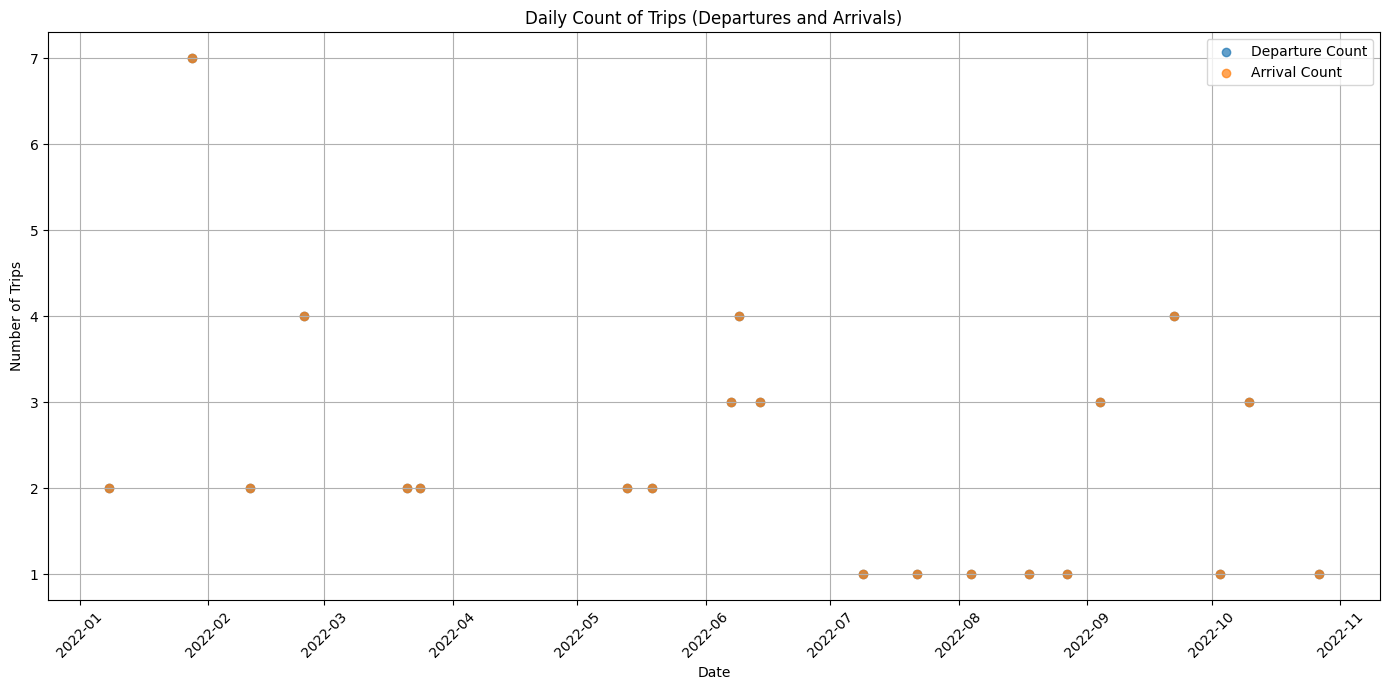

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert timestamp columns to datetime
filtered_df_nonserial_moves['timestamp_departure'] = pd.to_datetime(
    filtered_df_nonserial_moves['timestamp_departure'])
filtered_df_nonserial_moves['timestamp_arrival'] = pd.to_datetime(
    filtered_df_nonserial_moves['timestamp_arrival'])

# Sort the dataframe by departure timestamp
filtered_df_nonserial_moves.sort_values(
    by='timestamp_departure', inplace=True)

# Calculate the count of trips by day for departures and arrivals
departure_counts = filtered_df_nonserial_moves['timestamp_departure'].dt.date.value_counts(
).sort_index()
arrival_counts = filtered_df_nonserial_moves['timestamp_arrival'].dt.date.value_counts(
).sort_index()

# Plot the count of trips by day for both departures and arrivals
plt.figure(figsize=(14, 7))

# Use scatter plots to show actual data points
plt.scatter(departure_counts.index, departure_counts.values,
            label='Departure Count', alpha=0.7)
plt.scatter(arrival_counts.index, arrival_counts.values,
            label='Arrival Count', alpha=0.7)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Daily Count of Trips (Departures and Arrivals)')
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/bj/r88z9c613s17r0cbp2t30cmm0000gn/T/ipykernel_61879/2429336964.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_nonserial_moves['timestamp_departure'] = pd.to_datetime(
/var/folders/bj/r88z9c613s17r0cbp2t30cmm0000gn/T/ipykernel_61879/2429336964.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_nonserial_moves['timestamp_arrival'] = pd.to_datetime(
/var/folders/bj/r88z9c613s17r0cbp2t30cmm0000gn/T/ipykernel_61879/2429336964.py:12: SettingWithCopyWarning: 
A value is t

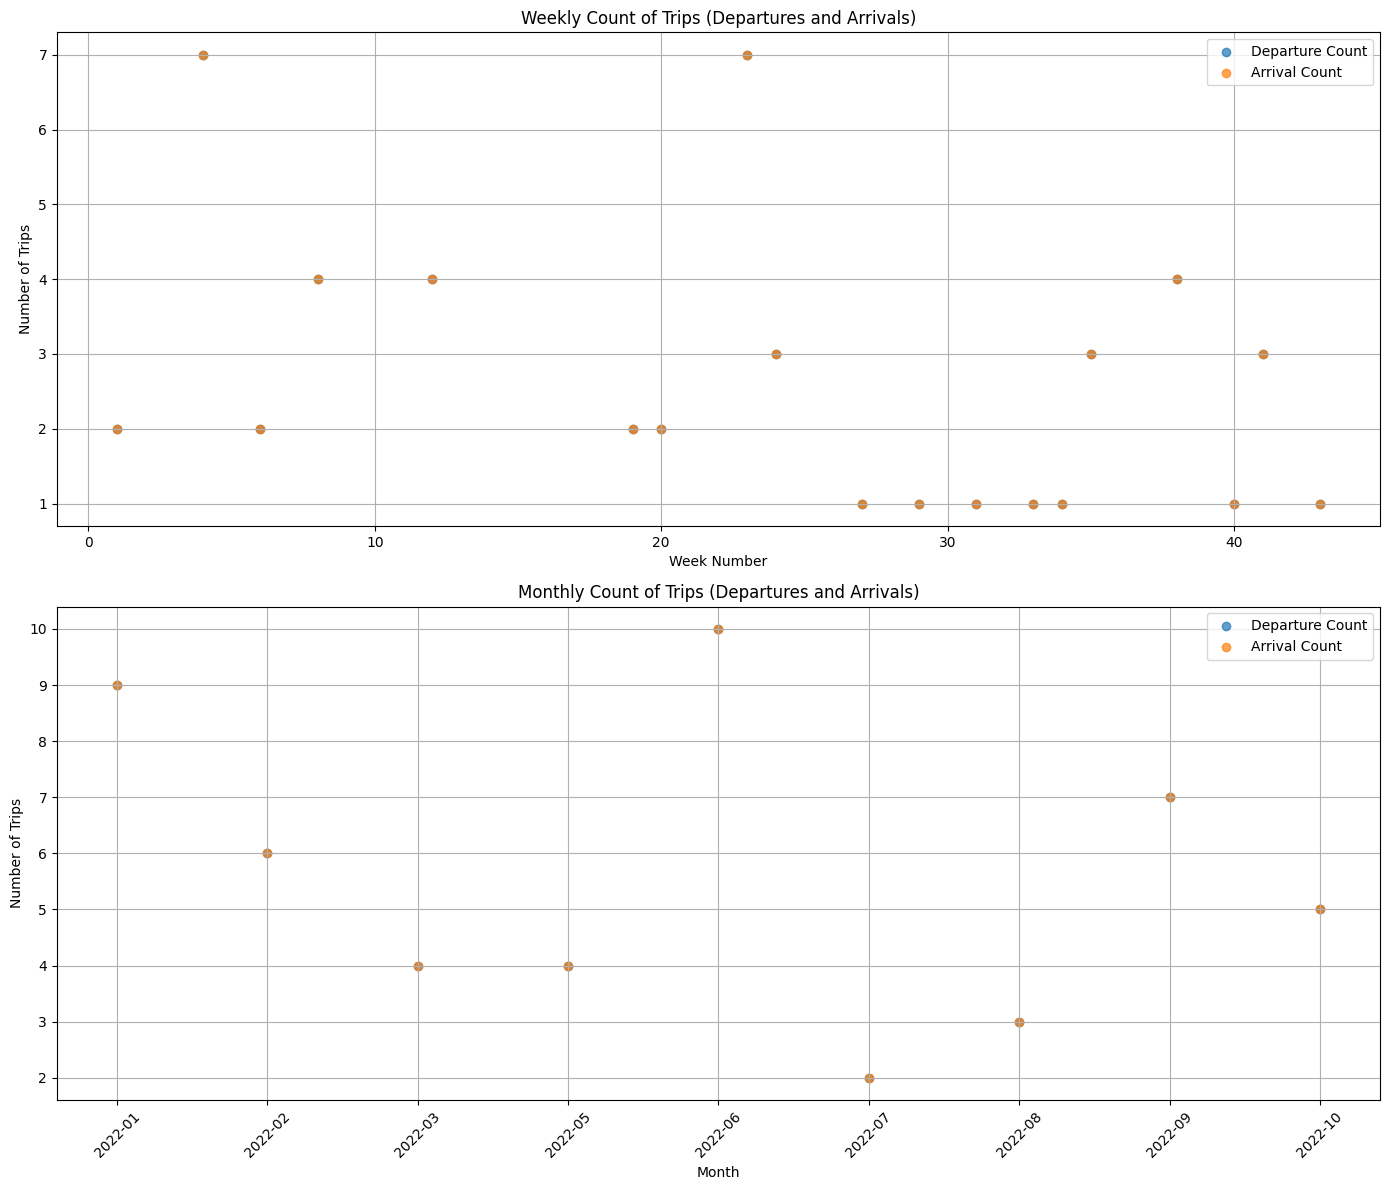

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert timestamp columns to datetime
filtered_df_nonserial_moves['timestamp_departure'] = pd.to_datetime(
    filtered_df_nonserial_moves['timestamp_departure'])
filtered_df_nonserial_moves['timestamp_arrival'] = pd.to_datetime(
    filtered_df_nonserial_moves['timestamp_arrival'])

# Sort the dataframe by departure timestamp
filtered_df_nonserial_moves.sort_values(
    by='timestamp_departure', inplace=True)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Weekly counts
departure_counts_weekly = filtered_df_nonserial_moves['timestamp_departure'].dt.isocalendar(
).week.value_counts().sort_index()
arrival_counts_weekly = filtered_df_nonserial_moves['timestamp_arrival'].dt.isocalendar(
).week.value_counts().sort_index()

# Monthly counts
departure_counts_monthly = filtered_df_nonserial_moves['timestamp_departure'].dt.to_period(
    'M').value_counts().sort_index()
arrival_counts_monthly = filtered_df_nonserial_moves['timestamp_arrival'].dt.to_period(
    'M').value_counts().sort_index()

# Plot weekly counts
ax1.scatter(departure_counts_weekly.index,
            departure_counts_weekly.values, label='Departure Count', alpha=0.7)
ax1.scatter(arrival_counts_weekly.index,
            arrival_counts_weekly.values, label='Arrival Count', alpha=0.7)
ax1.set_xlabel('Week Number')
ax1.set_ylabel('Number of Trips')
ax1.set_title('Weekly Count of Trips (Departures and Arrivals)')
ax1.legend()
ax1.grid(True)

# Plot monthly counts
ax2.scatter(departure_counts_monthly.index.astype(
    str), departure_counts_monthly.values, label='Departure Count', alpha=0.7)
ax2.scatter(arrival_counts_monthly.index.astype(str),
            arrival_counts_monthly.values, label='Arrival Count', alpha=0.7)
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Trips')
ax2.set_title('Monthly Count of Trips (Departures and Arrivals)')
ax2.legend()
ax2.grid(True)
ax2.tick_params(axis='x', rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

##### check trip purpose


### check OD stats: median trips per OD


# Trip purpose options mapping:

| question_option_id | question_id | option_name | option_text                            | option_description | option_alternative_text                |
| ------------------ | ----------- | ----------- | -------------------------------------- | ------------------ | -------------------------------------- |
| 1000               | 162         | 1           | Home                                   |                    | Home                                   |
| 1001               | 162         | 2           | To work                                |                    | To work                                |
| 1002               | 162         | 3           | Business visit in a working atmosphere |                    | Business visit in a working atmosphere |
| 1003               | 162         | 4           | Professionally                         |                    | Professionally                         |
| 1004               | 162         | 5           | Pick up/drop off people                |                    | Pick up/drop off people                |
| 1005               | 162         | 6           | Collect/deliver goods                  |                    | Collect/deliver goods                  |
| 1006               | 162         | 7           | Taking education/course                |                    | Taking education/course                |
| 1007               | 162         | 8           | Shopping/grocery shopping              |                    | Shopping/grocery shopping              |
| 1008               | 162         | 9           | Visitors/staying over                  |                    | Visitors/staying over                  |
| 1009               | 162         | 10          | Touring/hiking                         |                    | Touring/hiking                         |
| 1010               | 162         | 11          | Sports/hobbies                         |                    | Sports/hobbies                         |
| 1011               | 162         | 12          | Other leisure activities               |                    | Other leisure activities               |
| 1012               | 162         | 13          | Services/personal care                 |                    | Services/personal care                 |
| 1013               | 162         | 14          | Different purpose                      |                    | Different purpose                      |
| 1014               | 163         | 1           | To and from work                       |                    | To and from work                       |
| 1015               | 163         | 2           | Business visit in a working atmosphere |                    | Business visit in a working atmosphere |
| 1016               | 163         | 3           | Professionally                         |                    | Professionally                         |
| 1017               | 163         | 4           | Pick up/drop off people                |                    | Pick up/drop off people                |
| 1018               | 163         | 5           | Collect/deliver goods                  |                    | Collect/deliver goods                  |
| 1019               | 163         | 6           | Taking education/course                |                    | Taking education/course                |
| 1020               | 163         | 7           | Shopping/grocery shopping              |                    | Shopping/grocery shopping              |
| 1021               | 163         | 8           | Visitors/staying over                  |                    | Visitors/staying over                  |
| 1022               | 163         | 9           | Touring/hiking                         |                    | Touring/hiking                         |
| 1023               | 163         | 10          | Sports/hobbies                         |                    | Sports/hobbies                         |
| 1024               | 163         | 11          | Other leisure activities               |                    | Other leisure activities               |
| 1025               | 163         | 12          | Services/personal care                 |                    | Services/personal care                 |
| 1026               | 163         | 13          | Different motive                       |                    | Different motive                       |
| 1027               | 164         | 1           | To and from work                       |                    | To and from work                       |
| 1028               | 164         | 2           | Business and professional              |                    | Business and professional              |
| 1029               | 164         | 3           | Services/personal care                 |                    | Services/personal care                 |
| 1030               | 164         | 4           | Shopping/grocery shopping              |                    | Shopping/grocery shopping              |
| 1031               | 164         | 5           | Taking education/course                |                    | Taking education/course                |
| 1032               | 164         | 6           | Visitors/staying over                  |                    | Visitors/staying over                  |
| 1033               | 164         | 7           | Social recreational other              |                    | Social recreational other              |
| 1034               | 164         | 8           | Touring/hiking                         |                    | Touring/hiking                         |
| 1035               | 164         | 9           | Different motive                       |                    | Different motive                       |


**Question details:**

| question_id | question_name | question_text        | question_level | question_name\_\_NL | question_text\_\_NL    | kind |
| ----------- | ------------- | -------------------- | -------------- | ------------------- | ---------------------- | ---- |
| 162         | Goal          | Destination/Purpose  | V              | Doel                | Bestemming/Doel        | 0    |
| 163         | MotifV        | Motive               | V              | MotiefV             | Motief                 | 0    |
| 164         | KMotifV       | Class division motif | V              | KMotiefV            | Klassenindeling motief | 0    |


In [59]:
purpose_questions = [
    'destination/purpose',
    'motive',
    'class_division_motif'
]

df_trip_purpose = df_nonserial_moves[purpose_questions]

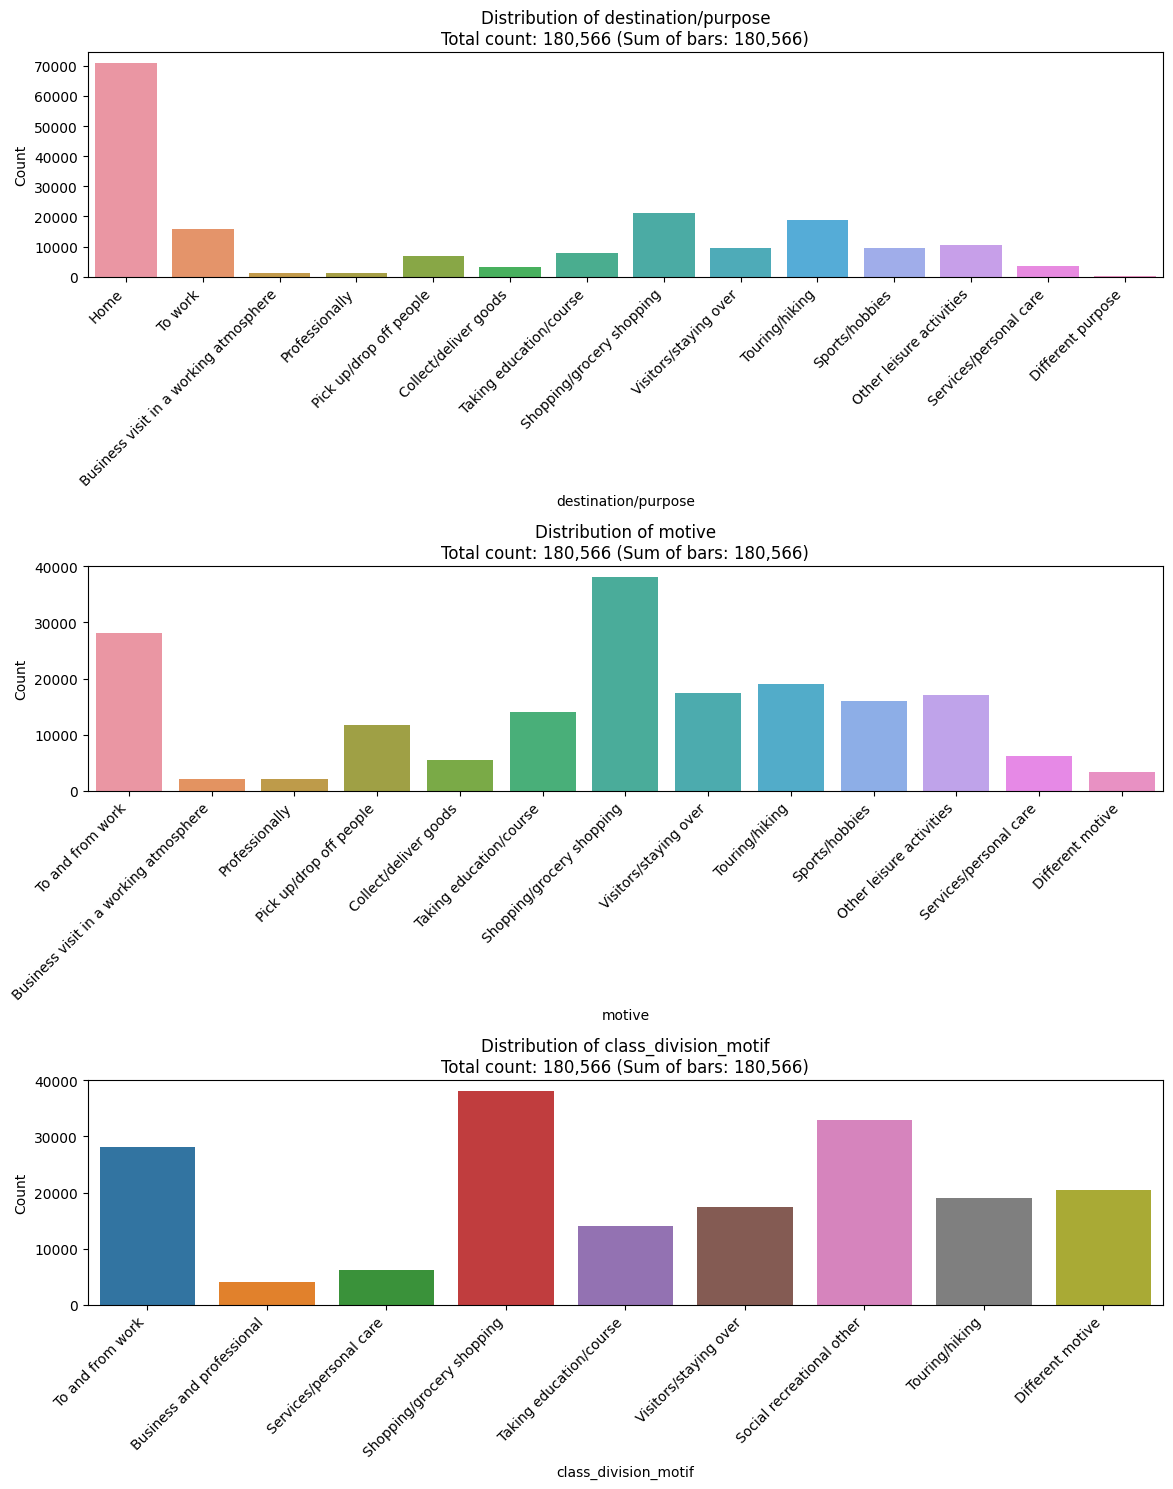


Missing Values Analysis:
                      Total Missing  Percentage Missing
destination/purpose               0                 0.0
motive                            0                 0.0
class_division_motif              0                 0.0

Zero Values Analysis:
                      Zero Values  Percentage Zeros  Total Rows
destination/purpose             0               0.0      180566
motive                          0               0.0      180566
class_division_motif            0               0.0      180566

Total Counts Analysis:

destination/purpose:
Total rows: 180,566
Sum of all counts: 180,566
Unique values: 14

motive:
Total rows: 180,566
Sum of all counts: 180,566
Unique values: 13

class_division_motif:
Total rows: 180,566
Sum of all counts: 180,566
Unique values: 9


In [60]:

# Plot distributions for your DataFrame
plot_value_distributions(df_trip_purpose, max_features=3)

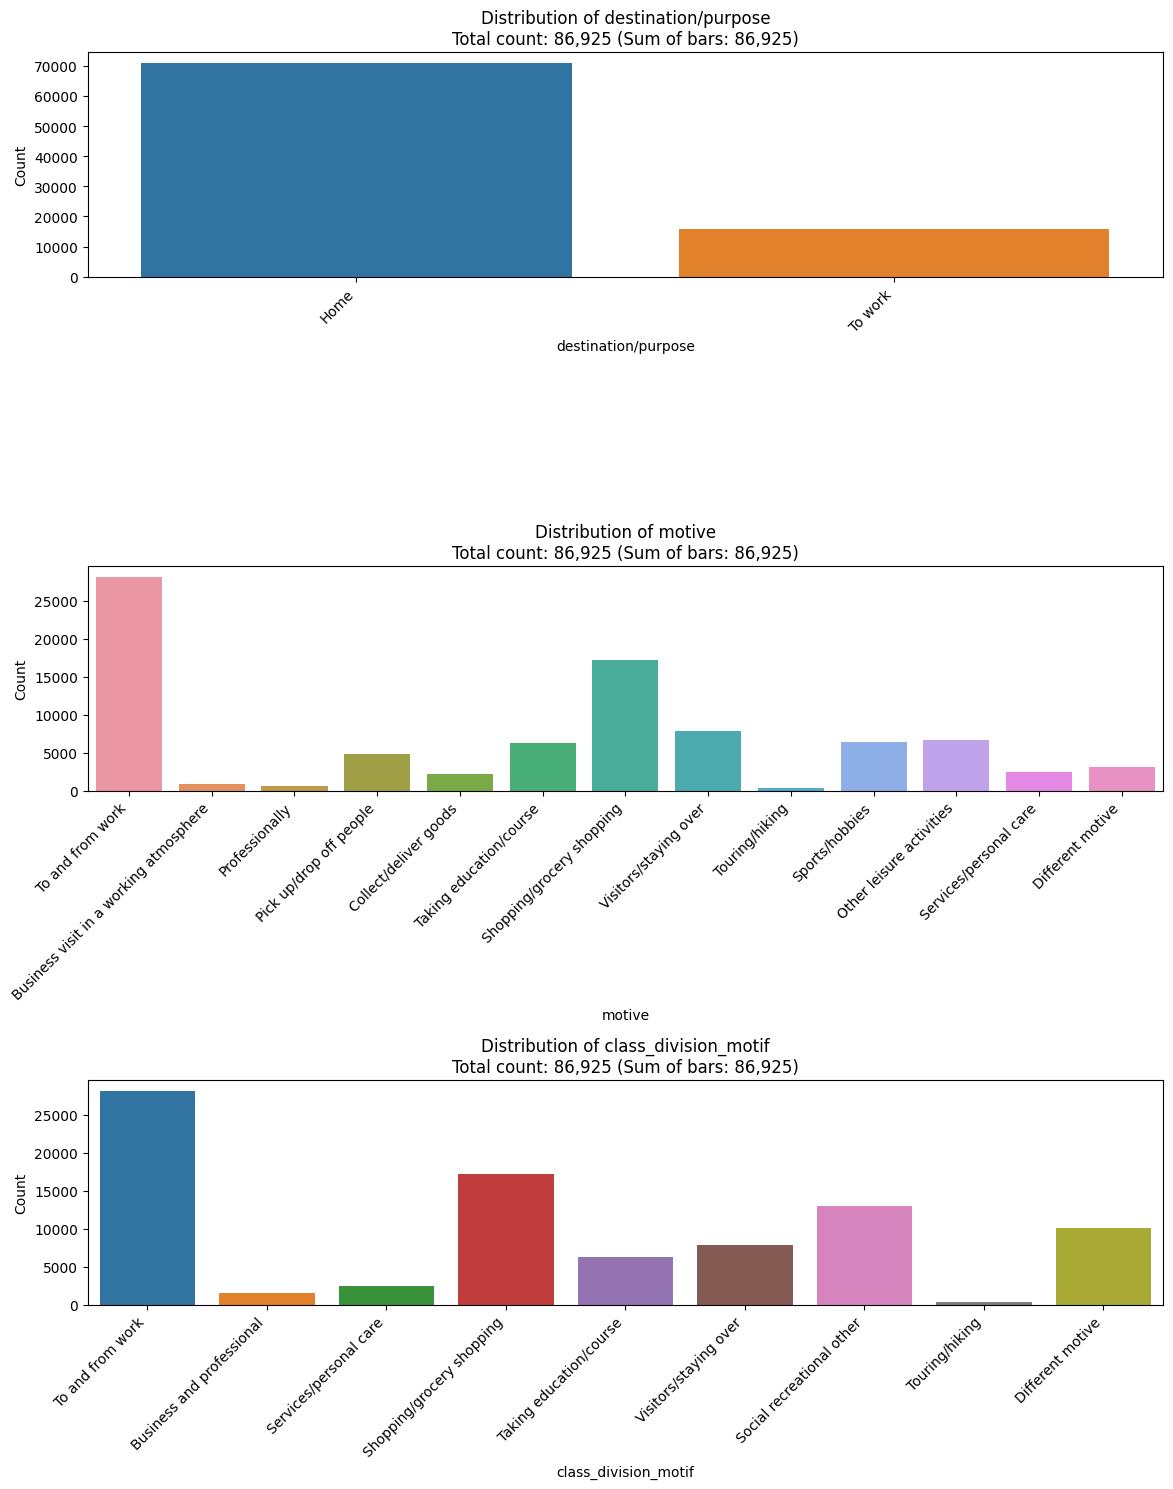


Missing Values Analysis:
                      Total Missing  Percentage Missing
destination/purpose               0                 0.0
motive                            0                 0.0
class_division_motif              0                 0.0

Zero Values Analysis:
                      Zero Values  Percentage Zeros  Total Rows
destination/purpose             0               0.0       86925
motive                          0               0.0       86925
class_division_motif            0               0.0       86925

Total Counts Analysis:

destination/purpose:
Total rows: 86,925
Sum of all counts: 86,925
Unique values: 2

motive:
Total rows: 86,925
Sum of all counts: 86,925
Unique values: 13

class_division_motif:
Total rows: 86,925
Sum of all counts: 86,925
Unique values: 9


In [61]:
# Filter for Home (1) or To work (2)
df_home_work = df_trip_purpose[df_trip_purpose['destination/purpose'].isin([
                                                                           1, 2])]

# Plot the distributions for this filtered dataset
plot_value_distributions(df_home_work, max_features=3)

##### check original distributions of purpose (before preprocessed by farina)


In [62]:
df_original_odin = pd.read_csv(
    '/Users/peterfalterbaum/Library/CloudStorage/OneDrive-Personal/business topics/master/ims/S3/thesis Cloud/master_implementation/data/ODIN/ODiN_ENG.csv')

In [63]:
odin_purpose_columns = ['Destination/Purpose',
                        'Motive', 'Class division motif']
df_odin_purposes = df_original_odin[odin_purpose_columns]

In [64]:
rename_dict = {
    # Question 162
    'Destination/Purpose': get_standardized_column_name('Goal'),
    'Motive': get_standardized_column_name('MotifV'),  # Question 163
    # Question 164
    'Class division motif': get_standardized_column_name('KMotifV')
}

# Rename the columns
df_odin_purposes = df_odin_purposes.rename(columns=rename_dict)

In [65]:
 df_odin_purposes = df_odin_purposes[
    (df_odin_purposes['destination/purpose'] != '#NULL!') &
    (df_odin_purposes['motive'] != '#NULL!') &
    (df_odin_purposes['class_division_motif'] != '#NULL!')
]

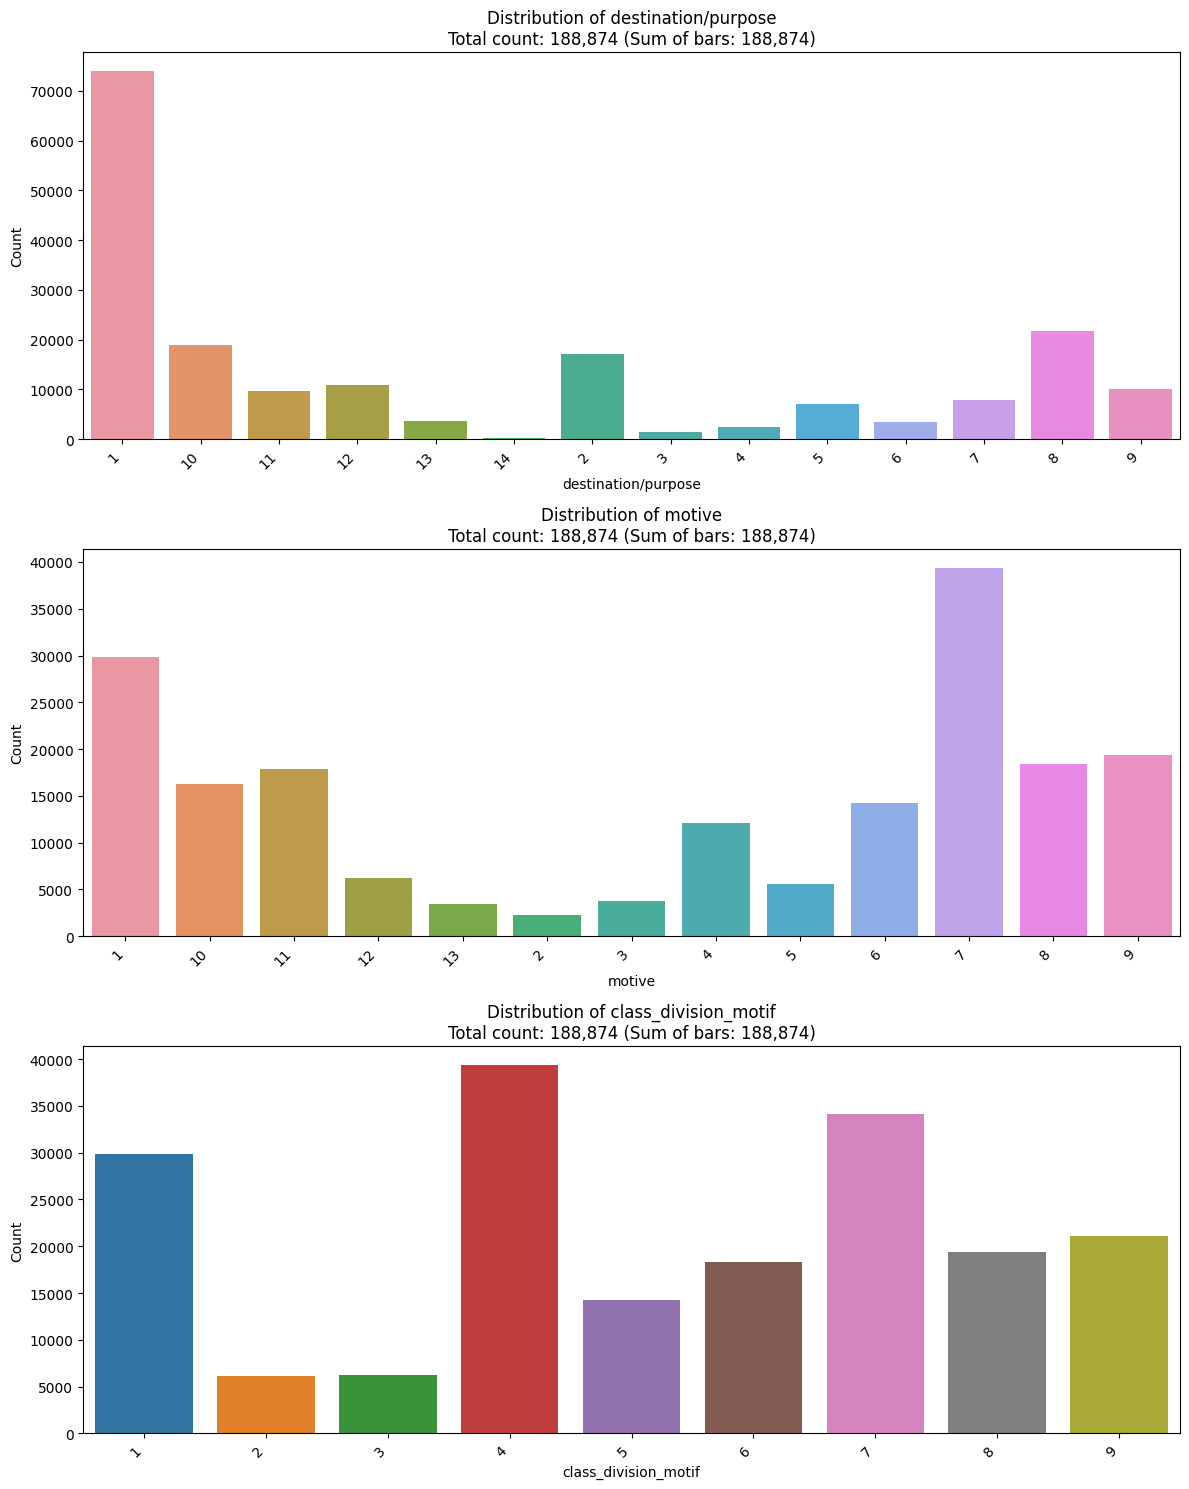


Missing Values Analysis:
                      Total Missing  Percentage Missing
destination/purpose               0                 0.0
motive                            0                 0.0
class_division_motif              0                 0.0

Zero Values Analysis:
                      Zero Values  Percentage Zeros  Total Rows
destination/purpose             0               0.0      188874
motive                          0               0.0      188874
class_division_motif            0               0.0      188874

Total Counts Analysis:

destination/purpose:
Total rows: 188,874
Sum of all counts: 188,874
Unique values: 14

motive:
Total rows: 188,874
Sum of all counts: 188,874
Unique values: 13

class_division_motif:
Total rows: 188,874
Sum of all counts: 188,874
Unique values: 9


In [66]:
plot_value_distributions(df_odin_purposes)

#### check correlations between travel mode, motive and destination/purpose


In [69]:

notebook_dir = Path(os.getcwd())
project_root = notebook_dir.parent
sys.path.append(str(project_root))

In [71]:
# Get the absolute path to the project root
# This assumes your notebook is in the 'code' directory
import os
from pathlib import Path
import sys
from cursor_helper.analyze_correlations import analyze_correlations, plot_marginal_distributions

In [72]:
df_correlation_check = df_nonserial_moves[[
    "main_mode_of_transport_class_movement", "motive", "destination/purpose"]]


Original value counts:
Travel mode values: main_mode_of_transport_class_movement
1    53886
2    16688
3    10369
4     7908
5    49089
6    37747
7     4879
Name: count, dtype: int64
Motive values: motive
1     28147
2      2110
3      2006
4     11781
5      5409
6     14091
7     38147
8     17347
9     19078
10    15957
11    17065
12     6114
13     3314
Name: count, dtype: int64
Purpose values: destination/purpose
1     70960
2     15965
3      1284
4      1352
5      6963
6      3229
7      7777
8     21008
9      9513
10    18712
11     9535
12    10436
13     3624
14      208
Name: count, dtype: int64

Mappings:
Travel mode mapping: {1: 'Passenger car - driver', 2: 'Passenger car - passenger', 3: 'Train', 4: 'Bus/tram/metro', 5: 'Bicycle', 6: 'On foot', 7: 'Other'}
Motive mapping: {1: 'To and from work', 2: 'Business visit in a working atmosphere', 3: 'Professionally', 4: 'Pick up/drop off people', 5: 'Collect/deliver goods', 6: 'Taking education/course', 7: 'Shopping/grocery

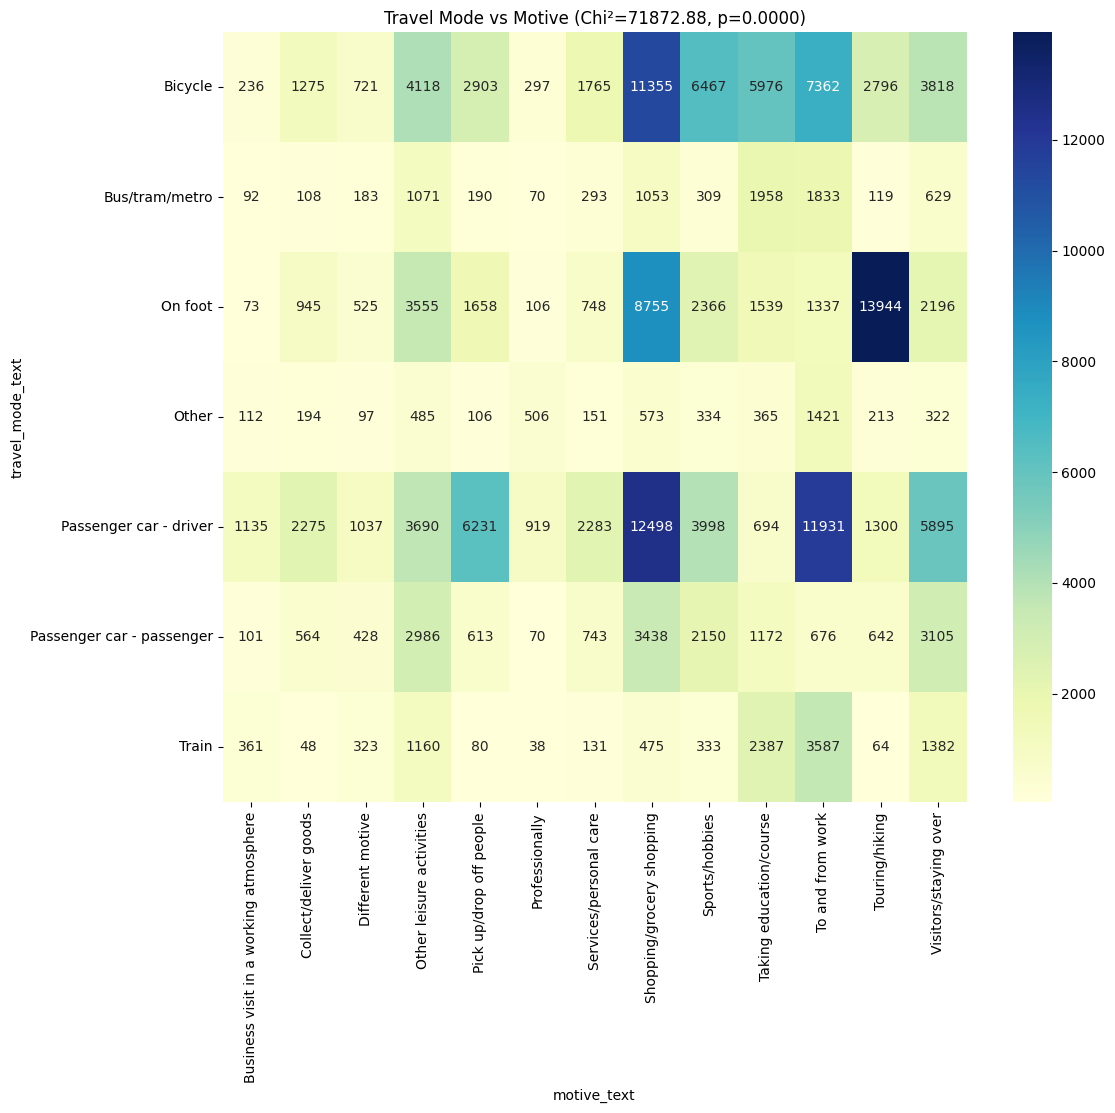

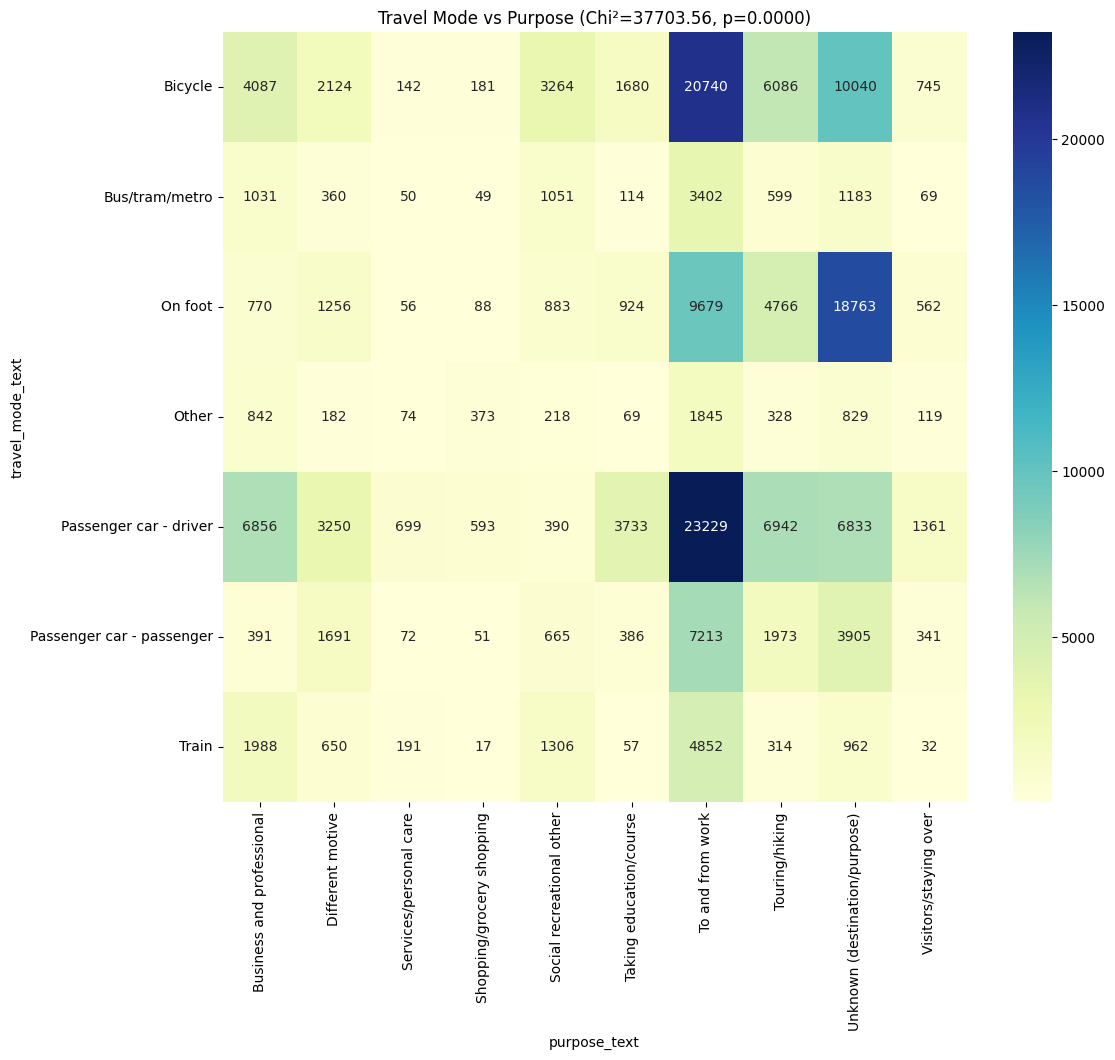

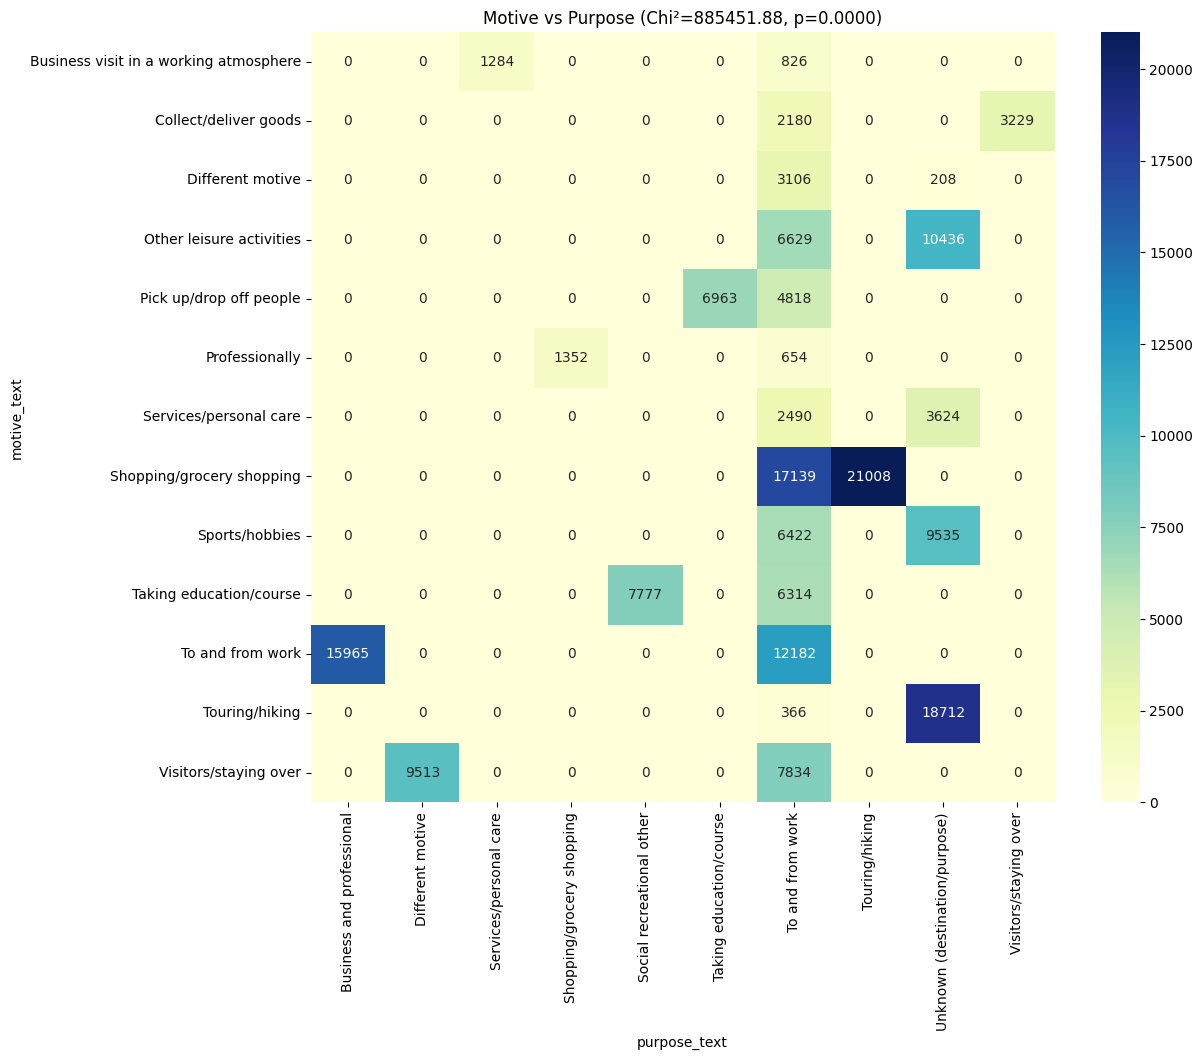

Cramer's V for Travel Mode vs Motive: 0.2576
Cramer's V for Travel Mode vs Purpose: 0.1866
Cramer's V for Motive vs Purpose: 0.7381


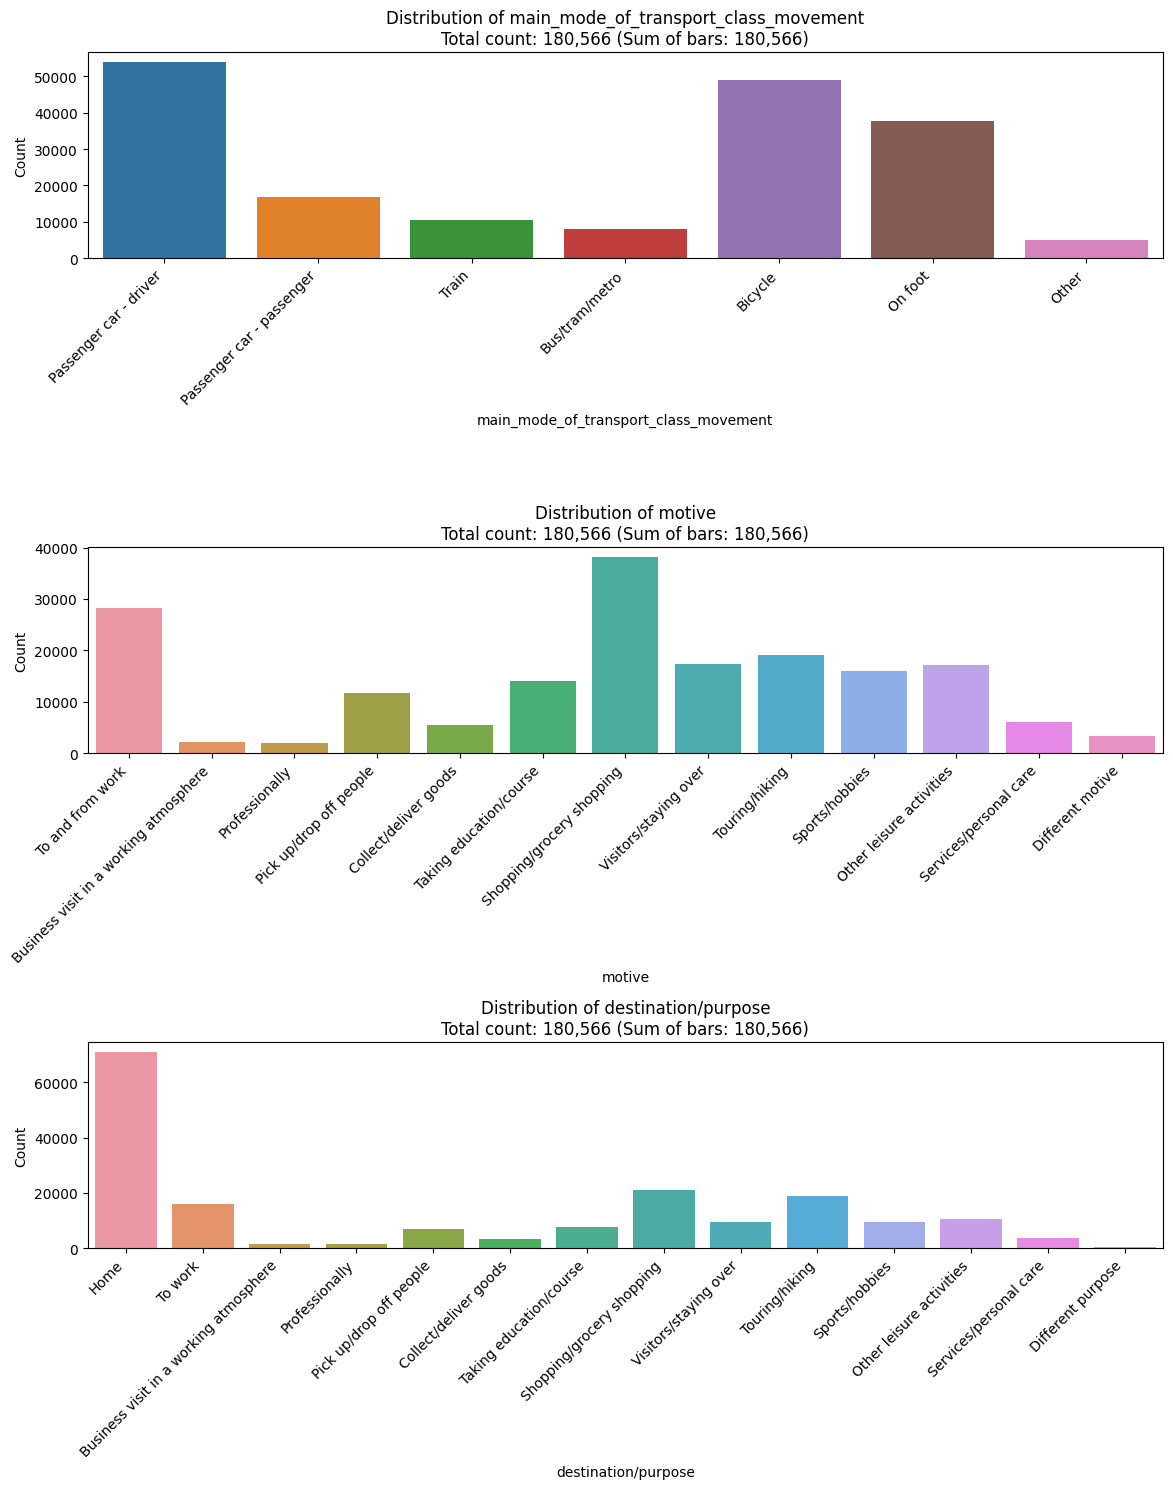


Missing Values Analysis:
                                       Total Missing  Percentage Missing
main_mode_of_transport_class_movement              0                 0.0
motive                                             0                 0.0
destination/purpose                                0                 0.0

Zero Values Analysis:
                                       Zero Values  Percentage Zeros  \
main_mode_of_transport_class_movement            0               0.0   
motive                                           0               0.0   
destination/purpose                              0               0.0   

                                       Total Rows  
main_mode_of_transport_class_movement      180566  
motive                                     180566  
destination/purpose                        180566  

Total Counts Analysis:

main_mode_of_transport_class_movement:
Total rows: 180,566
Sum of all counts: 180,566
Unique values: 7

motive:
Total rows: 180,566
Sum o

In [73]:
# Analyze correlations and get contingency tables
contingency_tables = analyze_correlations(
    df=df_correlation_check,
    travel_mode_col='main_mode_of_transport_class_movement',
    motive_col='motive',
    purpose_col='destination/purpose',
    output_dir='data/results/correlation_analysis_manual'
)

# Plot marginal distributions
plot_marginal_distributions(
    df=df_correlation_check,
    travel_mode_col='main_mode_of_transport_class_movement',
    motive_col='motive',
    purpose_col='destination/purpose',
    output_dir='data/results/correlation_analysis_manual'
)

#### verify validity of postal codes in data set and load netherlands data set


In [74]:
# Load the netherlands data set
netherlands_gdf = gpd.read_file(
    data_base_path + "/location/working_zips.geojson")
netherlands_gdf

,geo_point_2d,pc4_code,year,gem_code,prov_code,prov_name,gem_name,geometry
0,"{ ""lon"": 4.46740072448, ""lat"": 51.788861227600...",3273,2020,1963,28,Zuid-Holland,Hoeksche Waard,"POLYGON ((4.43784 51.79863, 4.43785 51.79863, ..."
1,"{ ""lon"": 4.6696329543199999, ""lat"": 51.8146764...",3311,2020,505,28,Zuid-Holland,Dordrecht,"POLYGON ((4.67705 51.82134, 4.67724 51.82134, ..."
2,"{ ""lon"": 4.7011524639099997, ""lat"": 51.7950291...",3319,2020,505,28,Zuid-Holland,Dordrecht,"MULTIPOLYGON (((4.72161 51.79191, 4.72134 51.7..."
3,"{ ""lon"": 4.9642664539899997, ""lat"": 52.0957634...",3481,2020,632,26,Utrecht,Woerden,"POLYGON ((4.9615 52.13436, 4.96174 52.13403, 4..."
4,"{ ""lon"": 5.1324759122500003, ""lat"": 52.1084854...",3571,2020,344,26,Utrecht,Utrecht,"POLYGON ((5.14233 52.11459, 5.14233 52.11458, ..."
...,...,...,...,...,...,...,...,...
4063,"{ ""lon"": 6.5328335903000001, ""lat"": 53.1803199...",9766,2020,1730,22,Drenthe,Tynaarlo,"POLYGON ((6.52753 53.19692, 6.52756 53.19691, ..."
4064,"{ ""lon"": 6.25927540103, ""lat"": 53.264004155199...",9845,2020,1969,20,Groningen,Westerkwartier,"POLYGON ((6.26131 53.27366, 6.26133 53.27366, ..."
4065,"{ ""lon"": 6.2583478993400004, ""lat"": 53.2390940...",9866,2020,1969,20,Groningen,Westerkwartier,"POLYGON ((6.27696 53.25704, 6.27704 53.25689, ..."
4066,"{ ""lon"": 6.6705909068600002, ""lat"": 53.3493331...",9992,2020,24,None,None,None,"POLYGON ((6.69736 53.36415, 6.69766 53.36403, ..."


In [75]:
location_columns = ['postal_code_of_departure_point', 'arrival_point_postal_code', 'person_index',
                    'movement_id', 'timestamp_departure', 'main_mode_of_transport_class_movement', 'timestamp_arrival']

location_df = df_nonserial_moves[location_columns]
location_df

,postal_code_of_departure_point,arrival_point_postal_code,person_index,movement_id,timestamp_departure,main_mode_of_transport_class_movement,timestamp_arrival
0,9481,9481,2,0,2022-07-26 10:45:00,5,2022-07-26 10:50:00
1,9481,9481,2,1,2022-07-26 11:45:00,5,2022-07-26 12:00:00
2,9481,9481,2,2,2022-07-26 14:30:00,5,2022-07-26 16:24:00
3,9482,9301,4,3,2022-04-11 06:30:00,1,2022-04-11 06:50:00
4,9301,9482,4,4,2022-04-11 16:30:00,1,2022-04-11 16:55:00
...,...,...,...,...,...,...,...
185164,1032,1506,61953,185164,2022-12-08 15:56:00,1,2022-12-08 16:31:00
185165,1506,1506,61953,185165,2022-12-08 16:50:00,6,2022-12-08 16:57:00
185166,1506,1506,61953,185166,2022-12-08 17:15:00,6,2022-12-08 17:20:00
185167,1506,1509,61953,185167,2022-12-08 18:20:00,1,2022-12-08 18:35:00


In [76]:
# Extract unique postal codes and compare with netherlands_gdf
unique_arrival_codes = set(location_df['arrival_point_postal_code'].dropna())
unique_departure_codes = set(
    location_df['postal_code_of_departure_point'].dropna())
all_unique_codes = unique_arrival_codes.union(unique_departure_codes)
netherlands_codes = set(netherlands_gdf['pc4_code'].dropna())
missing_codes = all_unique_codes - netherlands_codes

# Display results and rename columns for consistency
print(f"Total unique postal codes in location_df: {len(all_unique_codes)}")
print(
    f"Total unique postal codes in netherlands_gdf: {len(netherlands_codes)}")
print(
    f"Missing codes count: {len(missing_codes)}, Coverage: {len(all_unique_codes.intersection(netherlands_codes))/len(all_unique_codes)*100:.2f}%")
print(f"Sample missing codes: {list(missing_codes)[:5]}")

Total unique postal codes in location_df: 3743
Total unique postal codes in netherlands_gdf: 4068
Missing codes count: 0, Coverage: 100.00%
Sample missing codes: []


In [77]:
# Filter rows where either departure or arrival postal code is "3928"
# Using proper pandas boolean indexing with parentheses and &/| operators
location_df[(location_df["postal_code_of_departure_point"] == "3928") |
            (location_df["arrival_point_postal_code"] == "3928")]

,postal_code_of_departure_point,arrival_point_postal_code,person_index,movement_id,timestamp_departure,main_mode_of_transport_class_movement,timestamp_arrival


In [78]:
netherlands_gdf["pc4_code"] = netherlands_gdf["pc4_code"].astype(int)
netherlands_gdf.sort_values(by="pc4_code", inplace=True)

netherlands_gdf[(netherlands_gdf["pc4_code"] > 3920) &
                (netherlands_gdf["pc4_code"] < 3945)]

,geo_point_2d,pc4_code,year,gem_code,prov_code,prov_name,gem_name,geometry
1939,"{ ""lon"": 5.5150040556200004, ""lat"": 51.9917547...",3921,2020,340,26,Utrecht,Rhenen,"MULTIPOLYGON (((4.45915 51.91643, 4.45915 51.9..."
3535,"{ ""lon"": 5.4902922283800004, ""lat"": 51.9935776...",3922,2020,340,26,Utrecht,Rhenen,"POLYGON ((5.49862 51.99914, 5.49865 51.99914, ..."
2488,"{ ""lon"": 5.50075852244, ""lat"": 52.090199771999...",3925,2020,279,25,Gelderland,Scherpenzeel,"POLYGON ((5.50028 52.11189, 5.5003 52.11188, 5..."
3384,"{ ""lon"": 5.5346279197400001, ""lat"": 52.0699323...",3927,2020,339,26,Utrecht,Renswoude,"POLYGON ((5.55266 52.10334, 5.55298 52.10281, ..."
1668,"{ ""lon"": 5.4207158681100003, ""lat"": 52.0831371...",3931,2020,351,26,Utrecht,Woudenberg,"POLYGON ((5.48229 52.11727, 5.48239 52.11723, ..."
1057,"{ ""lon"": 5.3429379108399999, ""lat"": 52.0383349...",3941,2020,1581,26,Utrecht,Utrechtse Heuvelrug,"POLYGON ((5.33889 52.06842, 5.3389 52.06842, 5..."


In [79]:
# Check the count of postal codes (PC4) for Amsterdam
amsterdam_pc4_in_gdf = netherlands_gdf[netherlands_gdf['gem_name'] == 'Amsterdam']
amsterdam_pc4_count = len(amsterdam_pc4_in_gdf)
print(
    f"Number of unique Amsterdam postal codes in netherlands_gdf: {amsterdam_pc4_count}")
print(
    f"Amsterdam postal codes: {sorted(amsterdam_pc4_in_gdf['pc4_code'].tolist())}")

Number of unique Amsterdam postal codes in netherlands_gdf: 82
Amsterdam postal codes: [1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1081, 1082, 1083, 1086, 1087, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1112]


In [80]:
# Filter out rows where arrival_point_postal_code equals "3928" this postal code is not existent in netherlands
location_df = location_df[location_df['arrival_point_postal_code'] != "3928"]

#### export trip data (ODT)


In [81]:
# Rename columns to follow consistent naming convention
location_df = location_df.rename(columns={
    'postal_code_of_departure_point': 'pc4_departure',
    'arrival_point_postal_code': 'pc4_arrival',
    'main_mode_of_transport_class_movement': 'mode_of_transport'
})

# Verify the column names have been updated
if 'mode_of_transport' in location_df.columns:
    location_df.drop(columns=['mode_of_transport'], inplace=True)
location_df

,pc4_departure,pc4_arrival,person_index,movement_id,timestamp_departure,timestamp_arrival
0,9481,9481,2,0,2022-07-26 10:45:00,2022-07-26 10:50:00
1,9481,9481,2,1,2022-07-26 11:45:00,2022-07-26 12:00:00
2,9481,9481,2,2,2022-07-26 14:30:00,2022-07-26 16:24:00
3,9482,9301,4,3,2022-04-11 06:30:00,2022-04-11 06:50:00
4,9301,9482,4,4,2022-04-11 16:30:00,2022-04-11 16:55:00
...,...,...,...,...,...,...
185164,1032,1506,61953,185164,2022-12-08 15:56:00,2022-12-08 16:31:00
185165,1506,1506,61953,185165,2022-12-08 16:50:00,2022-12-08 16:57:00
185166,1506,1506,61953,185166,2022-12-08 17:15:00,2022-12-08 17:20:00
185167,1506,1509,61953,185167,2022-12-08 18:20:00,2022-12-08 18:35:00


In [84]:
location_df.to_csv(base_path + "/data/processed/odt_full.csv", index=False)